<h1><center><span style="color:#6b5b95">Telecom Churn case Study</span></center></h1>

In [429]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
# Label Encoder for ordinal variable
from sklearn.preprocessing import LabelEncoder
# Split Dataset
from sklearn.model_selection import train_test_split
# Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
# Feature selection
from sklearn.feature_selection import RFE
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import IncrementalPCA,PCA
# For handling imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Data Sourcing

In [430]:
master_df = pd.read_csv('telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [431]:
master_df.shape

(99999, 226)

In [432]:
master_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

# Data Cleaning - I 
- Lets filter high value who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [433]:
# Lets create a re usuable function to check Null values percentage, numbers, and column type
def analyze_null(data):
    master_na = pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False),columns=['Percent'])
    master_na = master_na[master_na.Percent!=0]
    total = data[master_na.index].isnull().sum().sort_values(ascending=False)
    types = data[master_na.index].dtypes
    master_na = pd.concat([master_na,total,types],axis=1).rename({0:"total",1:"dtype"},axis=1)
    return master_na

### Lets find amount for recharge data
lets analyze null values in recharge

In [434]:
analyze_null(master_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']])

,Percent,total,dtype
total_rech_data_6,74.85,74846,float64
av_rech_amt_data_6,74.85,74846,float64
total_rech_data_7,74.43,74428,float64
av_rech_amt_data_7,74.43,74428,float64
total_rech_data_8,73.66,73660,float64
av_rech_amt_data_8,73.66,73660,float64


In [435]:
# check null values in average data recharge
master_df['av_rech_amt_data_6'].isnull().sum()

74846

In [436]:
# check null values in total data recharge
master_df['total_rech_data_6'].isnull().sum()

74846

In [437]:
# Lets impute Null values with zeroes, we are considering only 6,7,8 for imputing with zero as in churn phase, we will be dropping the columns
master_df['av_rech_amt_data_6'].fillna(0.0,inplace=True)
master_df['av_rech_amt_data_7'].fillna(0.0,inplace=True)
master_df['av_rech_amt_data_8'].fillna(0.0,inplace=True)
master_df['total_rech_data_6'].fillna(0.0,inplace=True)
master_df['total_rech_data_7'].fillna(0.0,inplace=True)
master_df['total_rech_data_8'].fillna(0.0,inplace=True)
# check null values in total data recharge
analyze_null(master_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']])

,Percent,total,dtype


In [438]:
# Calculate total recharge data , which is average multiplies by total rech data
master_df['total_amt_data_6'] = master_df['av_rech_amt_data_6']*master_df['total_rech_data_6']
master_df['total_amt_data_7'] = master_df['av_rech_amt_data_7']*master_df['total_rech_data_7']
master_df['total_amt_data_8'] = master_df['av_rech_amt_data_8']*master_df['total_rech_data_8']


In [439]:
# Lets drop the above columns as we have derived the data recharge columns which is derived metric
master_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

#### Find the cutoff value above which the customers are high valued customers

In [440]:
# Lets Store the average in separate column
master_df['avg_total_rech_amt_goodph'] = (master_df['total_rech_amt_6']+master_df['total_rech_amt_7']+master_df['total_amt_data_6']+master_df['total_amt_data_7'])/2

In [441]:
# Calculate the cutoff value for high value customers
high_cust_cutoff = np.percentile(master_df['avg_total_rech_amt_goodph'],70)
high_cust_cutoff

478.0

In [442]:
# Check the shape
master_df[(master_df['avg_total_rech_amt_goodph']>high_cust_cutoff) ].shape

(29953, 224)

There will be around 29953 records left for analysis after keeping just high valued customers
#### Keep only high valued customers in DF

In [443]:
master_df = master_df[master_df['avg_total_rech_amt_goodph']>=high_cust_cutoff]
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0

### Tagging customers
Lets tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [444]:
# Lets check the null values
analyze_null(master_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']])

,Percent,total,dtype


In [445]:
# Check if the calls and internet is zero, convert from boolean to integer, and store it in a new column named 'churn'
master_df['churn'] = (master_df['total_ic_mou_9'].eq(0) & master_df['total_og_mou_9'].eq(0) & master_df['vol_2g_mb_9'].eq(0) & master_df['vol_3g_mb_9'].eq(0)).astype(int)
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252

#### Distribution of Churn vs Non Churn

In [446]:
# Lets check the distribution of churn
master_df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [447]:
# Lets check vbc columns
master_df.columns[master_df.columns.str.contains('vbc')]

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [448]:
# Rename jun,jul,aug,sep to 6,7,8,9
master_df.rename({'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'},axis=1,inplace=True)
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6

#### Lets Drop the columns of 9th month

In [449]:
# Store 9th columns in a list
col_9 = [i for i in master_df.columns if '_9' in i]
col_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [450]:
# Drop the 9th month columns
master_df.drop(col_9,axis=1,inplace=True)

In [451]:
# Lets Drop mobile number column as its a unique id column
master_df.drop('mobile_number',axis=1,inplace=True)

### Check for uniqueness 

In [452]:
# Lets check the columns where there is no variation at all and all rows have same values
uniq_cols = master_df.columns[master_df.nunique()==1]
uniq_cols

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [453]:
# Lets drop columns which are unique througout
master_df.drop(uniq_cols,axis=1,inplace=True)

In [454]:
# Check all object variable columns
date_cols = master_df.columns[master_df.dtypes==object].values
date_cols

array(['date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8'],
      dtype=object)

### convert to date data type 

In [455]:
for i in date_cols:
    master_df[i] = pd.to_datetime(master_df[i])

In [456]:
# lets store numerical columns in a separate bucket
numerical_cols = master_df.columns[master_df.dtypes==float].values

#### Analyze high Null valued column

In [457]:
null_df = analyze_null(master_df)
null_df[null_df.Percent>30]

,Percent,total,dtype
count_rech_3g_8,46.83,14048,float64
count_rech_2g_8,46.83,14048,float64
night_pck_user_8,46.83,14048,float64
max_rech_data_8,46.83,14048,float64
arpu_2g_8,46.83,14048,float64
arpu_3g_8,46.83,14048,float64
fb_user_8,46.83,14048,float64
date_of_last_rech_data_8,46.83,14048,datetime64[ns]
fb_user_6,44.15,13245,float64
max_rech_data_6,44.15,13245,float64


In [458]:
# Lets check the value counts in count_rech_3g_8
master_df[null_df[(null_df.Percent>30) & (null_df.dtype==float)].index]['count_rech_3g_8'].value_counts(normalize=True,dropna=False).head()

NaN    0.468251
0.0    0.310123
1.0    0.142062
2.0    0.044199
3.0    0.014900
Name: count_rech_3g_8, dtype: float64

In [459]:
# Lets check the value counts after imputing with zero in count_rech_3g_8
master_df[null_df[(null_df.Percent>30) & (null_df.dtype==float)].index].fillna(0)['count_rech_3g_8'].value_counts(normalize=True).head()

0.0    0.778374
1.0    0.142062
2.0    0.044199
3.0    0.014900
4.0    0.007333
Name: count_rech_3g_8, dtype: float64

#### We see that after imputing with zero there is high concentration towards to zeroes, hence lets drop these columns

In [460]:
# Lets check the DF again
master_df[null_df[(null_df.Percent>30)].index].head()

,count_rech_3g_8,count_rech_2g_8,night_pck_user_8,max_rech_data_8,arpu_2g_8,arpu_3g_8,fb_user_8,date_of_last_rech_data_8,fb_user_6,max_rech_data_6,night_pck_user_6,date_of_last_rech_data_6,arpu_3g_6,count_rech_2g_6,count_rech_3g_6,arpu_2g_6,arpu_2g_7,arpu_3g_7,night_pck_user_7,max_rech_data_7,count_rech_2g_7,date_of_last_rech_data_7,fb_user_7,count_rech_3g_7
0,1.0,0.0,0.0,252.0,212.17,212.17,1.0,2014-08-08,1.0,252.0,0.0,2014-06-21,212.17,0.0,1.0,212.17,212.17,212.17,0.0,252.0,0.0,2014-07-16,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
8,0.0,3.0,0.0,23.0,0.00,19.83,1.0,2014-08-23,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0.00,0.00,0.0,154.0,2.0,2014-07-31,1.0,0.0
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
23,2.0,0.0,0.0,179.0,150.67,197.27,1.0,2014-08-06,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,301.78,306.57,0.0,179.0,0.0,2014-07-07,1.0,2.0


In [461]:
# Drop columns which have more than 30% of data missing
master_df.drop(null_df[null_df.Percent>30].index.values,axis=1,inplace=True)

### Null values Imputation

In [462]:
null_df = analyze_null(master_df)
null_df

,Percent,total,dtype
loc_ic_mou_8,3.91,1174,float64
loc_og_t2m_mou_8,3.91,1174,float64
loc_ic_t2t_mou_8,3.91,1174,float64
loc_og_t2c_mou_8,3.91,1174,float64
loc_ic_t2m_mou_8,3.91,1174,float64
...,...,...,...
std_og_mou_7,1.79,537,float64
std_ic_mou_7,1.79,537,float64
spl_og_mou_7,1.79,537,float64
date_of_last_rech_7,0.33,98,datetime64[ns]


#### Impute null values in float columns with zeros

In [463]:
master_df[null_df[null_df.dtype=='float64'].index] = master_df[null_df[null_df.dtype=='float64'].index].fillna(0)

In [464]:
# Analyze null values again
analyze_null(master_df)

,Percent,total,dtype
date_of_last_rech_8,1.94,583,datetime64[ns]
date_of_last_rech_7,0.33,98,datetime64[ns]
date_of_last_rech_6,0.24,73,datetime64[ns]


In [465]:
# Remove null values records in date columns
master_df = master_df[~master_df['date_of_last_rech_8'].isnull()]
master_df = master_df[~master_df['date_of_last_rech_7'].isnull()]
master_df = master_df[~master_df['date_of_last_rech_6'].isnull()]
analyze_null(master_df)

,Percent,total,dtype


# EDA

In [466]:
# Lets check the shape
master_df.shape

(29309, 132)

In [467]:
# Lets check numerical variables data
master_df.select_dtypes(exclude=object)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0
21,514.453,597.753,637.7

In [468]:
# Lets keep the variables having less than 15 unique values in categorical variables
categorical_vars = list(master_df.columns[master_df.nunique()<15].values)
categorical_vars.remove("churn")
categorical_vars

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_8']

In [469]:
# lets check value counts of one of the variable above
master_df['monthly_2g_6'].value_counts()

0    24781
1     3957
2      537
3       28
4        6
Name: monthly_2g_6, dtype: int64

In [470]:
# convert to object type
for i in categorical_vars:
    master_df[i] = master_df[i].astype(object)

In [471]:
# Check categorical variables
master_df.select_dtypes(include=object).columns

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_8'],
      dtype='object')

In [472]:
# Lets keep the date columns in date variables bucket
date_cols = list(master_df.columns[master_df.columns.str.contains("date")].values)
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [473]:
# Lets keep the left out variables in numerical variables
numerical_cols = [i for i in master_df.columns if i not in date_cols+categorical_vars]
numerical_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [474]:
# check if all columns are segregated properly
master_df.shape[1]==len(numerical_cols+date_cols+categorical_vars)

True

# Univariate Analysis

## Numerical Values Analysis

### Correlation between numerical variables

In [475]:
corr_matrix = master_df[numerical_cols].corr().abs()
corr_matrix

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn
arpu_6,1.000000,0.702861,0.645882,0.348444,0.226131,0.197502,0.523075,0.357806,0.307142,0.128234,0.087800,0.093846,0.195953,0.148404,0.130035,0.171008,0.133338,0.129641,0.341964,0.258660,0.235664,0.144456,0.119953,0.111072,0.047003,0.010171,0.011899,0.337541,0.258827,0.238685,0.278673,0.168926,0.141930,0.309122,0.191342,0.151220,0.068969,0.057299,0.046701,0.394523,0.242256,0.195485,0.454410,0.432929,0.426974,0.124812,0.071177,0.047565,0.054928,0.025175,0.016028,0.567583,0.382737,0.324254,0.084061,0.066136,0.066894,0.191783,0.155576,0.132025,0.053460,0.041215,0.040459,0.184951,0.148955,0.132327,0.084349,0.064474,0.059634,0.102324,0.069524,0.066447,0.036271,0.034492,0.024692,0.125722,0.090269,0.083688,0.227374,0.177125,0.160440,0.030690,0.034651,0.010321,0.096629,0.066155,0.074734,0.016195,0.025240,0.013056,0.352521,0.145341,0.130919,0.955590,0.678226,0.635897,0.360688,0.283087,0.305839,0.294210,0.225430,0.215471,0.063892,0.099750,0.078629,0.157800,0.075315,0.089532,0.160883,0.196963,0.155099,0.087321,0.001326,0.024732,0.017269,0.042910,0.062095,0.058797,0.116139,0.093406,0.021806,0.004906,0.373134,0.052398
arpu_7,0.702861,1.000000,0.770929,0.214028,0.318700,0.269439,0.357270,0.489499,0.396325,0.094301,0.094484,0.093648,0.136235,0.180422,0.152220,0.106989,0.156402,0.134289,0.219079,0.301249,0.254195,0.114343,0.141960,0.123459,0.009811,0.040588,0.031497,0.215960,0.302291,0.254150,0.168736,0.258830,0.219039,0.205207,0.305591,0.237899,0.055687,0.071882,0.054297,0.251280,0.379271,0.304407,0.429097,0.514246,0.457355,0.069571,0.114150,0.068235,0.018125,0.026276,0.017906,0.370938,0.534711,0.430138,0.046051,0.074647,0.072006,0.117354,0.169032,0.141714,0.032902,0.045839,0.044416,0.110384,0.163485,0.142284,0.059911,0.083845,0.086772,0.070359,0.098372,0.090181,0.034031,0.042092,0.032970,0.088816,0.122696,0.116504,0.140982,0.209425,0.183157,0.007444,0.015853,0.009814,0.058760,0.099539,0.082078,0.007358,0.023578,0.016017,0.168947,0.299305,0.216553,0.702085,0.955183,0.759615,0.278191,0.392382,0.369896,0.262119,0.325648,0.246754,0.093609,0.058108,0.052806,0.072055,0.157980,0.116602,0.183323,0.155099,0.137403,0.190733,0.026037,0.010276,0.000638,0.030895,0.081898,0.101192,0.056783,0.0119

### Heatmap of correlation Matrix

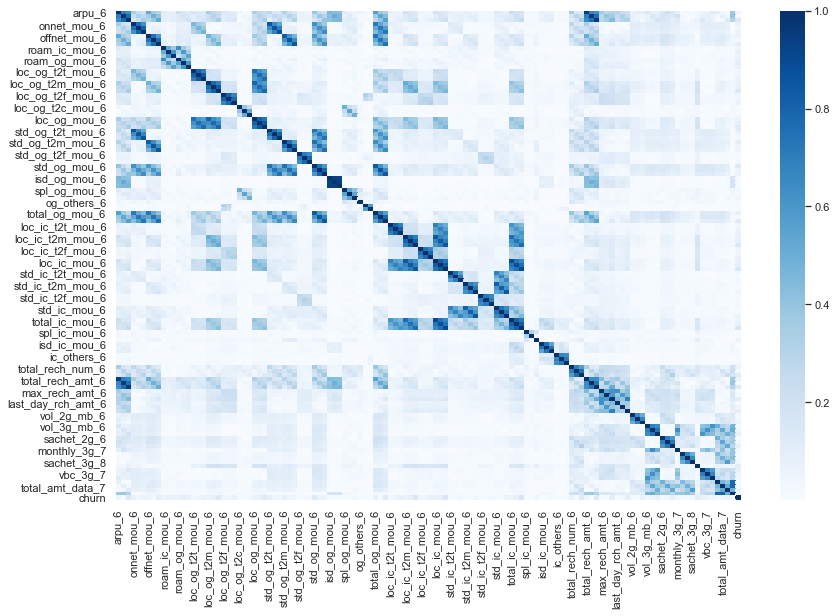

In [476]:
# Plot Heatmap of Correlation matrix
plt.figure(figsize=[14,9])
sns.heatmap(corr_matrix,cmap='Blues')
plt.show()

### Top highly correlated variables with Churn


In [477]:
# Sort Correlation values of variable wrt Sale Price
corr_matrix['churn'].sort_values(ascending=False)

churn                 1.000000
total_ic_mou_8        0.161560
loc_ic_mou_8          0.156944
loc_ic_t2m_mou_8      0.146367
loc_og_t2m_mou_8      0.139417
                        ...   
spl_ic_mou_6          0.001148
sachet_3g_7           0.000896
loc_og_t2c_mou_6      0.000657
last_day_rch_amt_6    0.000329
total_rech_amt_7      0.000174
Name: churn, Length: 124, dtype: float64

### Observation
- We don't see any numerical variable which have high correlation with churn

### Top highly correlated variables

In [478]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.9
high_corr_variables = {column:upper.index[upper[column] >= 0.9][0] for column in upper.columns if any(upper[column] >= 0.9) and column!='churn'}
high_corr_variables

{'isd_og_mou_7': 'isd_og_mou_6',
 'isd_og_mou_8': 'isd_og_mou_6',
 'total_rech_amt_6': 'arpu_6',
 'total_rech_amt_7': 'arpu_7',
 'total_rech_amt_8': 'arpu_8'}

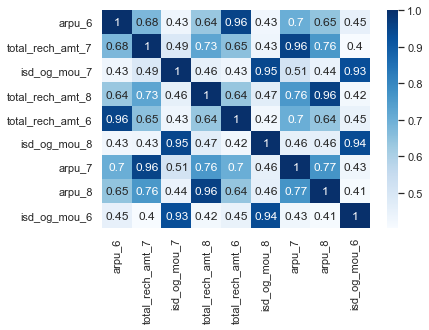

In [479]:
sns.heatmap(master_df[set(list(high_corr_variables.keys())+list(high_corr_variables.values()))].corr().abs(),annot=True,cmap='Blues')
plt.show()

### Observation
- we see that isd_og_mou_7,isd_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8 are highly correlated, hence we can remove them
- Also lets rename isd_og_mou_6 to isd_og_mou

In [480]:
master_df.drop(high_corr_variables.keys(),inplace=True,axis=1)
master_df.rename({'isd_og_mou_6':'isd_og_mou'},axis=1,inplace=True)

numerical_cols.remove('isd_og_mou_6')
numerical_cols.append('isd_og_mou')

In [481]:
for i in high_corr_variables.keys():
    numerical_cols.remove(i)
# check if all columns are segregated properly
master_df.shape[1]==len(numerical_cols+date_cols+categorical_vars)

True

In [482]:
master_df[numerical_cols].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn,isd_og_mou
count,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000,29309.000000
mean,557.336657,565.213995,516.702002,261.675662,270.536172,238.021534,372.857161,379.977659,339.253170,16.170494,12.728273,12.748229,26.553550,20.378117,20.237626,84.945262,86.648774,79.313753,162.799039,163.767819,153.533342,6.328984,6.431829,5.934969,1.576495,1.895515,1.736982,254.081524,256.856828,238.790033,166.339116,175.910962,150.973570,179.117758,188.848497,159.342482,1.780133,1.809393,1.591536,347.240742,366.572589,311.910972,5.821937,7.160540,6.676333,0.664579,0.043646,0.058760,609.894164,632.750434,559.432113,65.852307,67.385403,63.697435,150.716830,152.991633,148.633019,15.325076,16.163902,14.633174,231.903876,236.550689,226.973093,14.840498,15.553446,14.164063,29.186243,31.119730,28.422243,2.688364,2.816540,2.

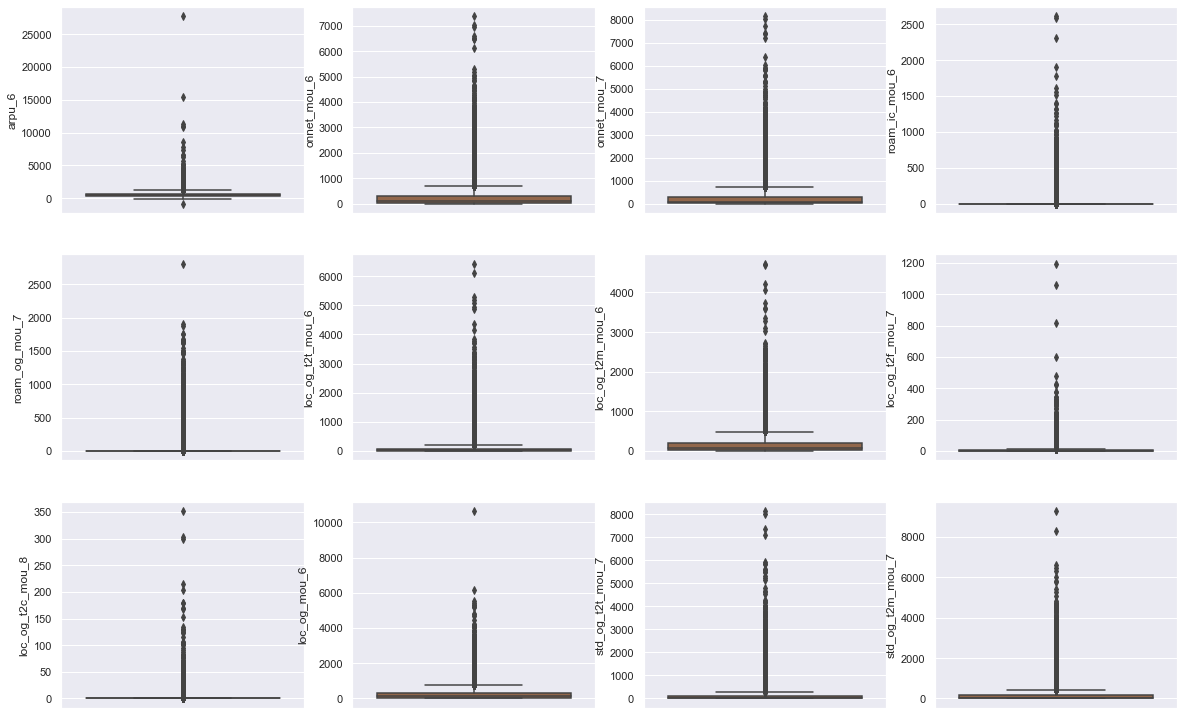

In [483]:
# Check the outliers in the random numeric columns 

plt.figure(figsize=(20, 22))
plt.subplot(5,4,1)
sns.boxplot(y = 'arpu_6', palette='copper', data = master_df)
plt.subplot(5,4,2)
sns.boxplot(y = 'onnet_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,3)
sns.boxplot(y = 'onnet_mou_7', palette='copper', data = master_df)
plt.subplot(5,4,4)
sns.boxplot(y = 'roam_ic_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,5)
sns.boxplot(y = 'roam_og_mou_7', palette='copper', data = master_df)
plt.subplot(5,4,6)
sns.boxplot(y = 'loc_og_t2t_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,7)
sns.boxplot(y = 'loc_og_t2m_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,8)
sns.boxplot(y = 'loc_og_t2f_mou_7', palette='copper', data = master_df)

plt.subplot(5,4,9)
sns.boxplot(y = 'loc_og_t2c_mou_8', palette='copper', data = master_df)
plt.subplot(5,4,10)
sns.boxplot(y = 'loc_og_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,11)
sns.boxplot(y = 'std_og_t2t_mou_7', palette='copper', data = master_df)
plt.subplot(5,4,12)
sns.boxplot(y = 'std_og_t2m_mou_7', palette='copper', data = master_df)
plt.show()

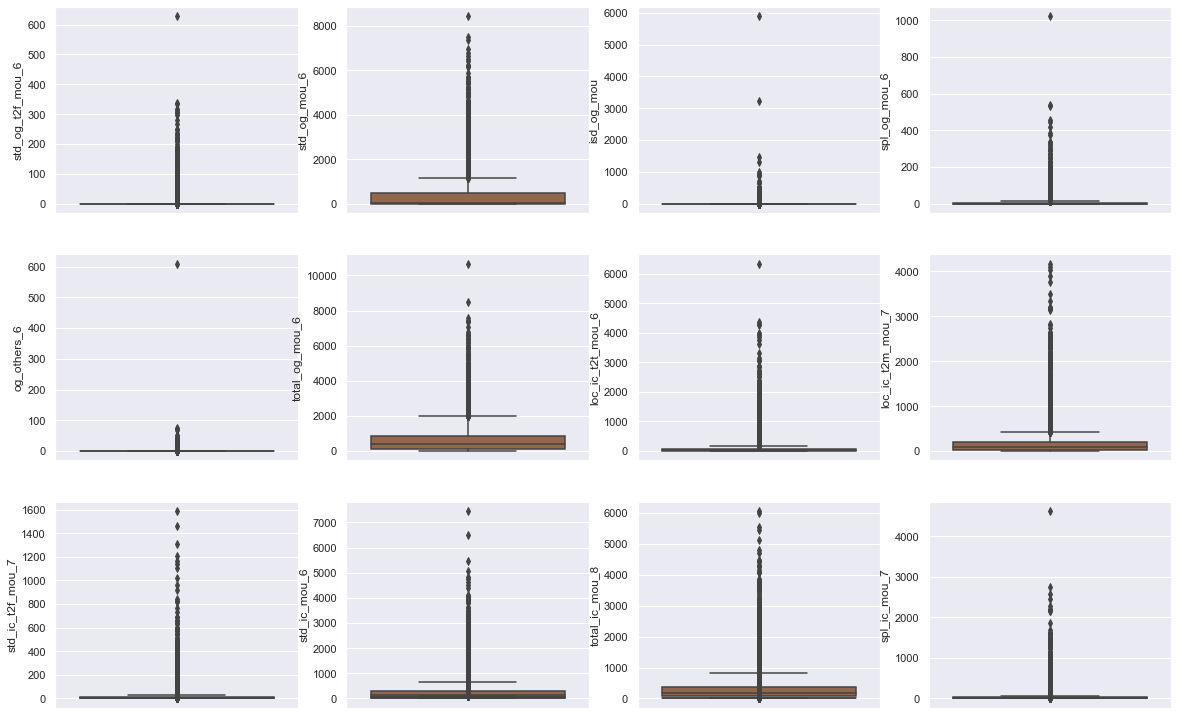

In [484]:
# Check the outliers in the random numeric columns 

plt.figure(figsize=(20, 22))
plt.subplot(5,4,1)
sns.boxplot(y = 'std_og_t2f_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,2)
sns.boxplot(y = 'std_og_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,3)
sns.boxplot(y = 'isd_og_mou', palette='copper', data = master_df)
plt.subplot(5,4,4)
sns.boxplot(y = 'spl_og_mou_6', palette='copper', data = master_df)

plt.subplot(5,4,5)
sns.boxplot(y = 'og_others_6', palette='copper', data = master_df)
plt.subplot(5,4,6)
sns.boxplot(y = 'total_og_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,7)
sns.boxplot(y = 'loc_ic_t2t_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,8)
sns.boxplot(y = 'loc_ic_t2m_mou_7', palette='copper', data = master_df)

plt.subplot(5,4,9)
sns.boxplot(y = 'loc_ic_t2f_mou_8', palette='copper', data = master_df)
plt.subplot(5,4,10)
sns.boxplot(y = 'loc_ic_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,11)
sns.boxplot(y = 'std_ic_t2t_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,12)
sns.boxplot(y = 'std_ic_t2m_mou_6', palette='copper', data = master_df)

plt.subplot(5,4,9)
sns.boxplot(y = 'std_ic_t2f_mou_7', palette='copper', data = master_df)
plt.subplot(5,4,10)
sns.boxplot(y = 'std_ic_mou_6', palette='copper', data = master_df)
plt.subplot(5,4,11)
sns.boxplot(y = 'total_ic_mou_8', palette='copper', data = master_df)
plt.subplot(5,4,12)
sns.boxplot(y = 'spl_ic_mou_7', palette='copper', data = master_df)
plt.show()

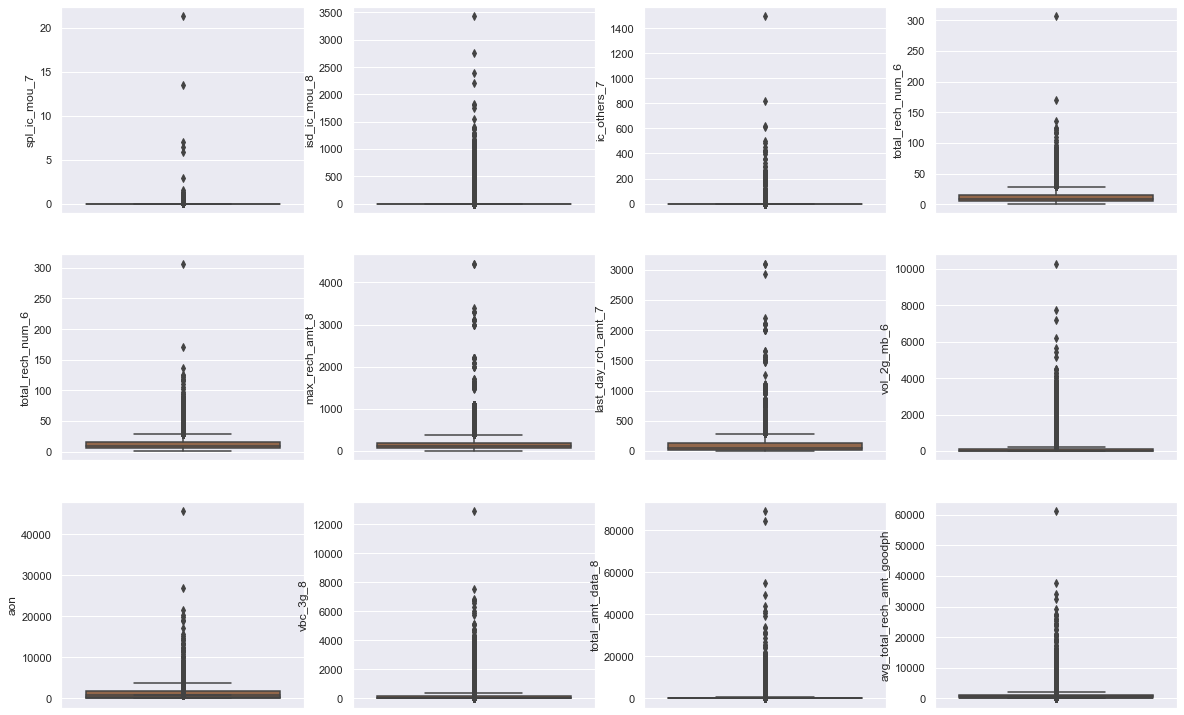

In [485]:
# Check the outliers in the random numeric columns 

plt.figure(figsize=(20, 22))
plt.subplot(5,4,1)
sns.boxplot(y = 'spl_ic_mou_7', palette='copper', data = master_df)
plt.subplot(5,4,2)
sns.boxplot(y = 'isd_ic_mou_8', palette='copper', data = master_df)
plt.subplot(5,4,3)
sns.boxplot(y = 'ic_others_7', palette='copper', data = master_df)
plt.subplot(5,4,4)
sns.boxplot(y = 'total_rech_num_6', palette='copper', data = master_df)

plt.subplot(5,4,5)
sns.boxplot(y = 'total_rech_num_6', palette='copper', data = master_df)
plt.subplot(5,4,6)
sns.boxplot(y = 'max_rech_amt_8', palette='copper', data = master_df)
plt.subplot(5,4,7)
sns.boxplot(y = 'last_day_rch_amt_7', palette='copper', data = master_df)
plt.subplot(5,4,8)
sns.boxplot(y = 'vol_2g_mb_6', palette='copper', data = master_df)

plt.subplot(5,4,9)
sns.boxplot(y = 'vol_3g_mb_6', palette='copper', data = master_df)
plt.subplot(5,4,10)
sns.boxplot(y = 'sachet_2g_7', palette='copper', data = master_df)
plt.subplot(5,4,11)
sns.boxplot(y = 'monthly_3g_7', palette='copper', data = master_df)
plt.subplot(5,4,12)
sns.boxplot(y = 'sachet_3g_7', palette='copper', data = master_df)

plt.subplot(5,4,9)
sns.boxplot(y = 'aon', palette='copper', data = master_df)
plt.subplot(5,4,10)
sns.boxplot(y = 'vbc_3g_8', palette='copper', data = master_df)
plt.subplot(5,4,11)
sns.boxplot(y = 'total_amt_data_8', palette='copper', data = master_df)
plt.subplot(5,4,12)
sns.boxplot(y = 'avg_total_rech_amt_goodph', palette='copper', data = master_df)
plt.show()

### Observation
<div class="alert alert-block alert-success">After looking at all the visualization and mean and median using describe() method, we can say that data contains a lot of Outliers, and we need to take care of these outliers from dataset.
<br><br>
Below piece of code will extract all the outliers apart from 25 and 75 percentile range IQR Range.</div>

In [486]:
num_out_li = []
for i in numerical_cols:
    print(i)
    data = master_df[i]
    q1, q3 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q3 - q1
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q1 - cut_off, q3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    num_out_li.append(len(outliers))
    print("****"*5)
print(num_out_li)

arpu_6
Percentiles: 25th=311.327, 75th=697.944, IQR=386.617
Identified outliers: 1322
********************
arpu_7
Percentiles: 25th=314.978, 75th=701.116, IQR=386.138
Identified outliers: 1420
********************
arpu_8
Percentiles: 25th=241.340, 75th=666.371, IQR=425.031
Identified outliers: 1332
********************
onnet_mou_6
Percentiles: 25th=17.510, 75th=292.710, IQR=275.200
Identified outliers: 3199
********************
onnet_mou_7
Percentiles: 25th=16.760, 75th=295.210, IQR=278.450
Identified outliers: 3328
********************
onnet_mou_8
Percentiles: 25th=11.800, 75th=245.780, IQR=233.980
Identified outliers: 3371
********************
offnet_mou_6
Percentiles: 25th=72.610, 75th=487.460, IQR=414.850
Identified outliers: 1917
********************
offnet_mou_7
Percentiles: 25th=71.630, 75th=496.230, IQR=424.600
Identified outliers: 1894
********************
offnet_mou_8
Percentiles: 25th=51.460, 75th=444.840, IQR=393.380
Identified outliers: 1907
********************
roam_ic_mo

Identified outliers: 1906
********************
spl_ic_mou_6
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 6416
********************
spl_ic_mou_7
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 1968
********************
spl_ic_mou_8
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 2579
********************
isd_ic_mou_6
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 6463
********************
isd_ic_mou_7
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 6770
********************
isd_ic_mou_8
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 6331
********************
ic_others_6
Percentiles: 25th=0.000, 75th=0.050, IQR=0.050
Identified outliers: 6529
********************
ic_others_7
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 7028
********************
ic_others_8
Percentiles: 25th=0.000, 75th=0.010, IQR=0.010
Identified outliers: 7310
**************

### Observation
As we can see that distribution of outliers in 6th, 7th and 8th month is similar.
So we will remove outliers from all the 7th month columns and check mean median again usnig describe() method.

In [487]:
# Lets take a backup for checkpoint to remove Outliers
df = master_df.copy()
df.head(2)
master_df.shape

(29309, 127)

### Remove Outliers

In [488]:
# Removing values beyond 99% from all 7th month columns 
master_df = master_df[master_df["arpu_7"] < master_df['arpu_7'].quantile(0.99)]
master_df = master_df[master_df["onnet_mou_7"] < master_df['onnet_mou_7'].quantile(0.99)]
master_df = master_df[master_df["offnet_mou_7"] < master_df['offnet_mou_7'].quantile(0.99)]
master_df = master_df[master_df["roam_ic_mou_7"] < master_df['roam_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["roam_og_mou_7"] < master_df['roam_og_mou_7'].quantile(0.99)]
master_df = master_df[master_df["loc_og_t2t_mou_7"] < master_df['loc_og_t2t_mou_7'].quantile(0.99)]
master_df = master_df[master_df["loc_og_t2m_mou_7"] < master_df['loc_og_t2m_mou_7'].quantile(0.99)]
master_df = master_df[master_df["loc_og_t2f_mou_7"] < master_df['loc_og_t2f_mou_7'].quantile(0.99)]
master_df = master_df[master_df["loc_og_t2c_mou_7"] < master_df['loc_og_t2c_mou_7'].quantile(0.99)]
master_df = master_df[master_df["loc_og_mou_7"] < master_df['loc_og_mou_7'].quantile(0.99)]


In [489]:
# Lets check class distribution again
master_df.churn.value_counts(normalize=True)

0    0.931288
1    0.068712
Name: churn, dtype: float64

In [490]:
# Removing values beyond 99% from all 7th month columns 
master_df = master_df[master_df["loc_ic_mou_7"] < master_df['loc_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["std_ic_t2t_mou_7"] < master_df['std_ic_t2t_mou_7'].quantile(0.99)]
master_df = master_df[master_df["std_ic_t2m_mou_7"] < master_df['std_ic_t2m_mou_7'].quantile(0.99)]
master_df = master_df[master_df["std_ic_t2f_mou_7"] < master_df['std_ic_t2f_mou_7'].quantile(0.99)]
master_df = master_df[master_df["std_ic_mou_7"] < master_df['std_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["total_ic_mou_7"] < master_df['total_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["total_og_mou_7"] < master_df['total_og_mou_7'].quantile(0.99)]
master_df = master_df[master_df["spl_ic_mou_7"] < master_df['spl_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["isd_ic_mou_7"] < master_df['isd_ic_mou_7'].quantile(0.99)]
master_df = master_df[master_df["ic_others_7"] < master_df['ic_others_7'].quantile(0.99)]

In [491]:
# Lets check class distribution again
master_df.churn.value_counts(normalize=True)

0    0.929979
1    0.070021
Name: churn, dtype: float64

In [492]:
# Removing values beyond 99% from all 7th month columns 
master_df = master_df[master_df["total_rech_num_7"] < master_df['total_rech_num_7'].quantile(0.99)]
master_df = master_df[master_df["max_rech_amt_7"] < master_df['max_rech_amt_7'].quantile(0.99)]
master_df = master_df[master_df["last_day_rch_amt_7"] < master_df['last_day_rch_amt_7'].quantile(0.99)]
master_df = master_df[master_df["vol_2g_mb_7"] < master_df['vol_2g_mb_7'].quantile(0.99)]
master_df = master_df[master_df["vol_3g_mb_7"] < master_df['vol_3g_mb_7'].quantile(0.99)]
master_df = master_df[master_df["sachet_2g_7"] < master_df['sachet_2g_7'].quantile(0.99)]
master_df = master_df[master_df["monthly_3g_7"] < master_df['monthly_3g_7'].quantile(0.99)]
master_df = master_df[master_df["sachet_3g_7"] < master_df['sachet_3g_7'].quantile(0.99)]
master_df = master_df[master_df["vbc_3g_7"] < master_df['vbc_3g_7'].quantile(0.99)]
master_df = master_df[master_df["total_amt_data_7"] < master_df['total_amt_data_7'].quantile(0.99)]

In [493]:
# Lets check class distribution again
master_df.churn.value_counts(normalize=True)

0    0.928589
1    0.071411
Name: churn, dtype: float64

In [494]:
master_df[numerical_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn,isd_og_mou
count,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000
mean,498.542679,463.816782,437.735651,236.066971,222.608104,200.652864,334.536927,312.428232,288.199472,10.981430,5.469308,7.403228,19.114929,9.831712,12.344547,64.269441,59.448525,57.517889,142.892063,137.138687,131.400753,4.604964,4.393886,4.343338,1.358713,1.208202,1.417587,211.774632,200.989360,193.269807,164.069648,159.139354,138.208392,168.866658,159.228758,138.936141,1.298402,1.137234,1.100279,334.238385,319.508979,278.248066,5.296167,5.775550,5.887561,0.636175,0.014189,0.023330,553.136172,527.188775,478.412905,54.397997,51.598510,50.179773,133.715905,128.957377,128.097076,12.825626,13.137616,12.311764,200.949208,193.703146,190.597971,9.367364,8.594268,8.431216,20.027592,18.116358,18.232709,1.537507,1.246772,1.395322

# Bivariate Analysis
- Recharge amount related variables
- 2G and 3G usage related attributes
- Average Revenue Per User
- Minutes of usage - voice calls
- Tenure of Customers Analysis

## Recharge amount related variables

In [495]:
# Check all the recharge amount columns
master_df.columns[master_df.columns.str.contains('rech_amt')]

Index(['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'avg_total_rech_amt_goodph'],
      dtype='object')

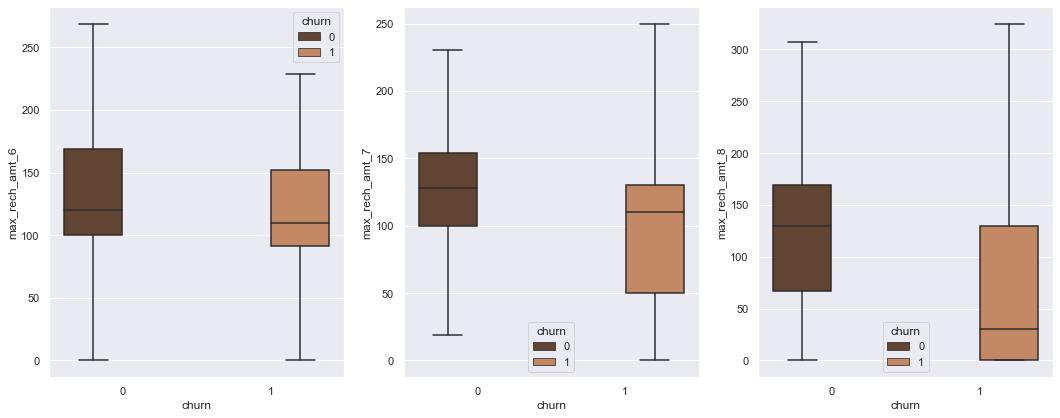

In [496]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="max_rech_amt_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="max_rech_amt_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="max_rech_amt_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

### Observation: 
- Maximum recharge amount has been decreased in 8th month.

## 2G and 3G usage related attributes

In [497]:
# Lets store these variables in a list
_2g_and_3g_columns = master_df.columns[master_df.columns.str.contains('2g|3g',regex=True)]
_2g_and_3g_columns

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

### Distribution of churn in 2g/3g variables

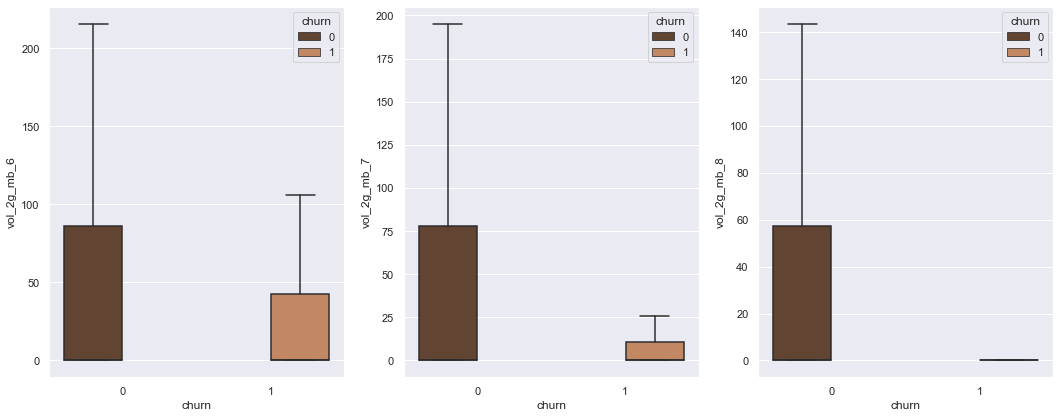

In [498]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="vol_2g_mb_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="vol_2g_mb_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="vol_2g_mb_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

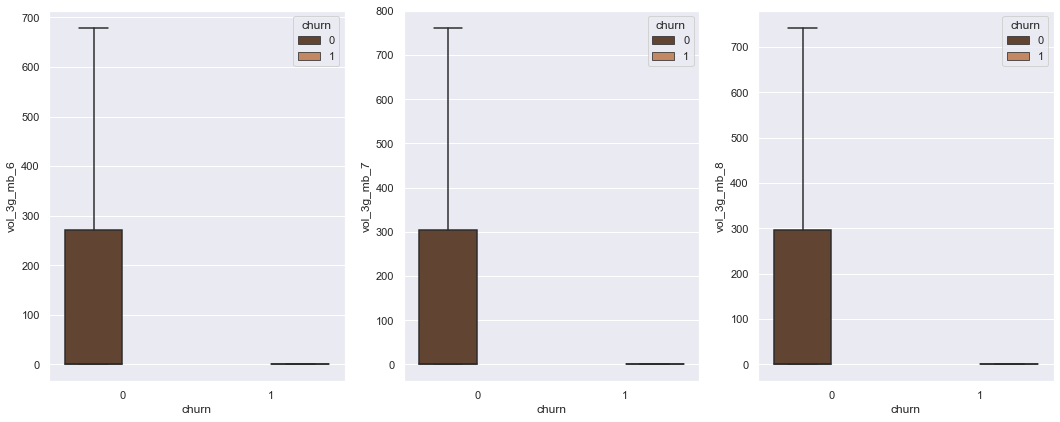

In [499]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="vol_3g_mb_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="vol_3g_mb_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="vol_3g_mb_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

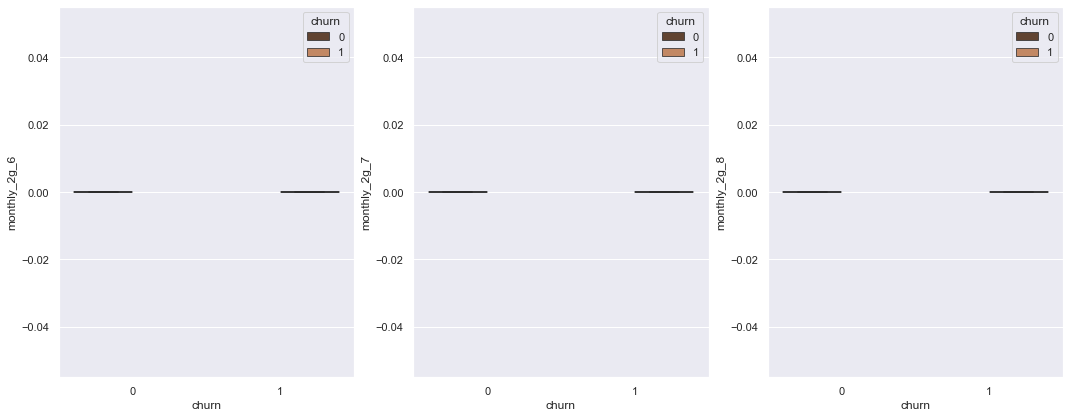

In [500]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="monthly_2g_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="monthly_2g_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="monthly_2g_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

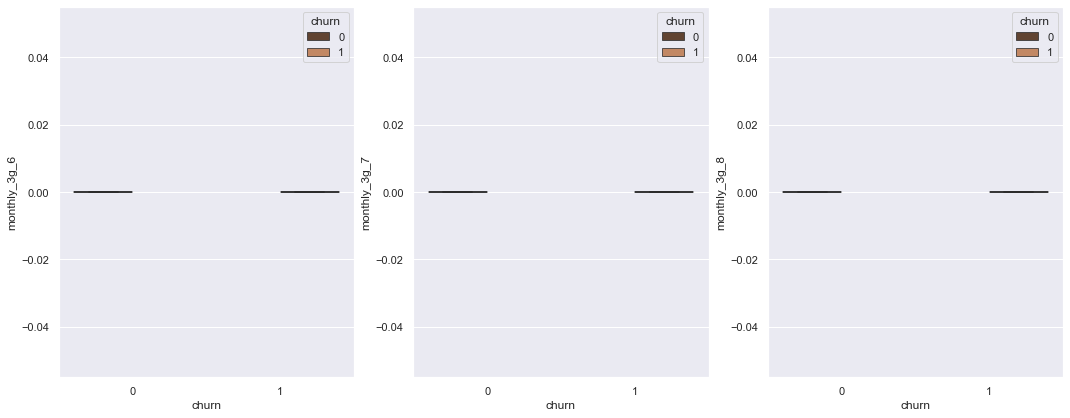

In [501]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="monthly_3g_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="monthly_3g_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="monthly_3g_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

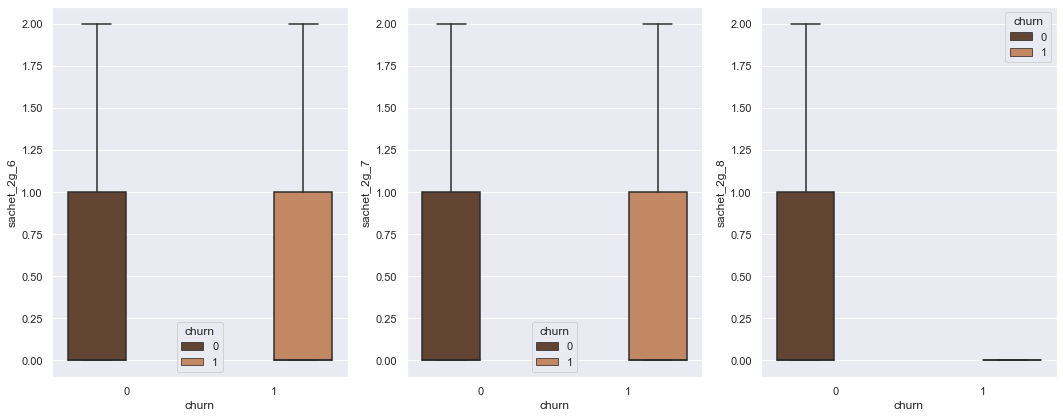

In [502]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="sachet_2g_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="sachet_2g_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="sachet_2g_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

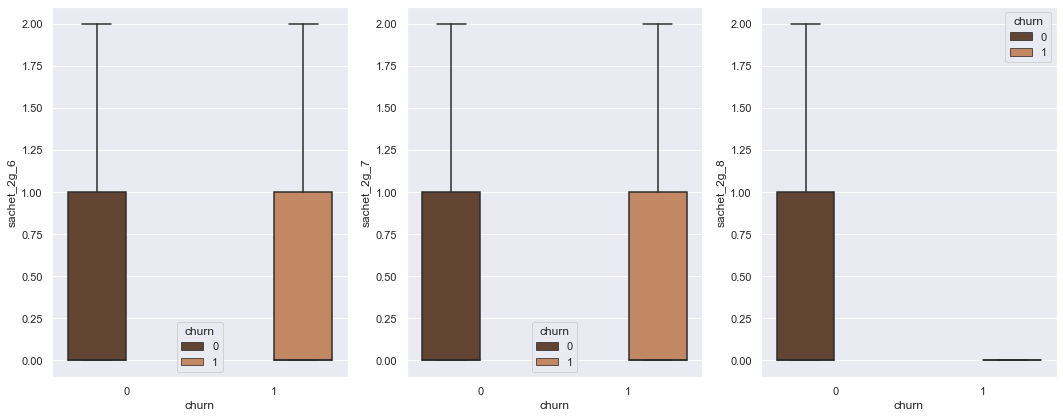

In [503]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="sachet_2g_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="sachet_2g_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="sachet_2g_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

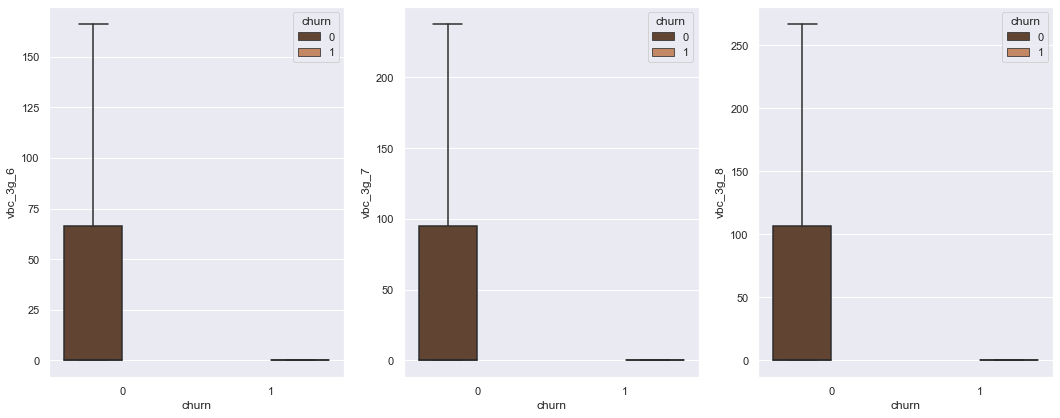

In [504]:
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="vbc_3g_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="vbc_3g_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="vbc_3g_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()


### Average churn in 2g/3g variables

In [505]:
def mean_bar_chart(df,columns):
    df_non_churn = df[df.churn==0].filter(columns)
    df_churn = df[df.churn==1].filter(columns)

    df_non_churn = pd.DataFrame([df_non_churn.mean()],index={'Non Churn'})
    df_churn = pd.DataFrame([df_churn.mean()],index={'Churn'})

    mean_table = pd.concat([df_non_churn,df_churn])
    mean_table.T.plot.bar(figsize=(20,8),rot=90)
    plt.show()
    
    return mean_table

<Figure size 1728x1080 with 0 Axes>

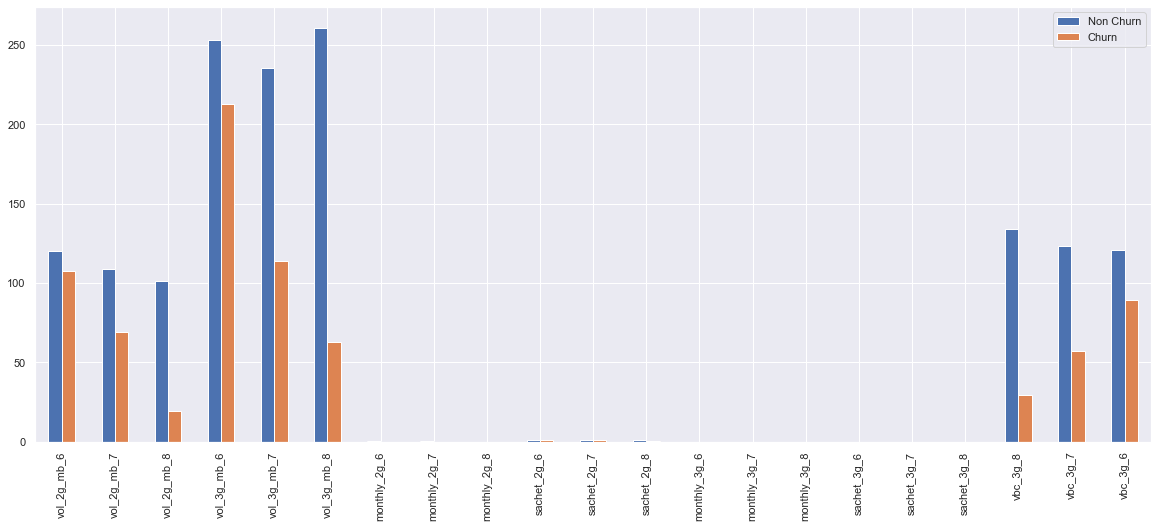

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,119.960888,108.712201,101.554370,253.304600,235.506836,260.948052,0.192956,0.203248,0.173769,1.058026,1.133895,1.079230,0.153496,0.116260,0.150083,0.147135,0.126552,0.14067,134.066188,123.140534,120.656940
Churn,107.536772,69.451944,19.094095,212.973262,113.634479,63.184990,0.086752,0.062542,0.026900,1.041022,0.857431,0.265636,0.150639,0.083389,0.050437,0.161399,0.111634,0.02152,29.748547,56.965642,89.035414


In [506]:
plt.figure(figsize=(24, 15))
mean_bar_chart(master_df,_2g_and_3g_columns)

### Observation: 
We have two observations from above visualization and table:
1. 2G and 3G usage for churned customers drops in 8th month compare to 6th and 7th
2. We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

## Average Revenue Per User

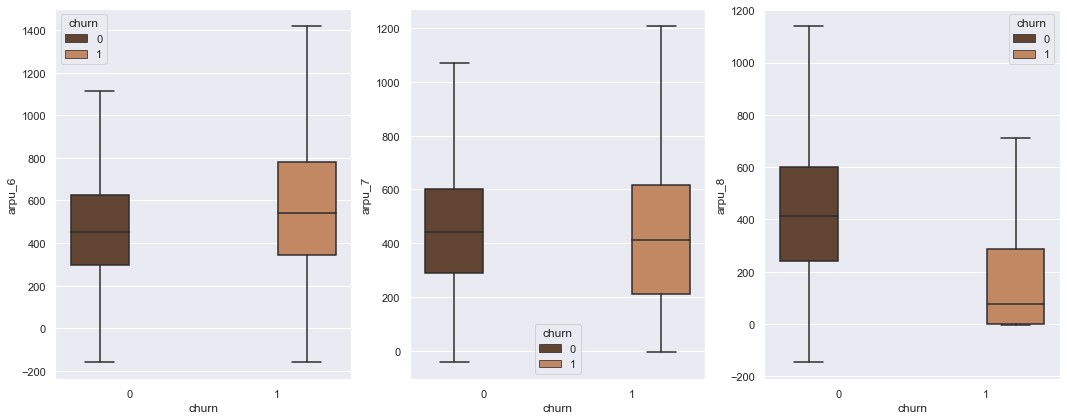

In [507]:
# Checking columns for average revenue per user
arpu_cols = master_df.columns[master_df.columns.str.contains('arpu_')]
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="arpu_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="arpu_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="arpu_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

### Average churn in revenue variables

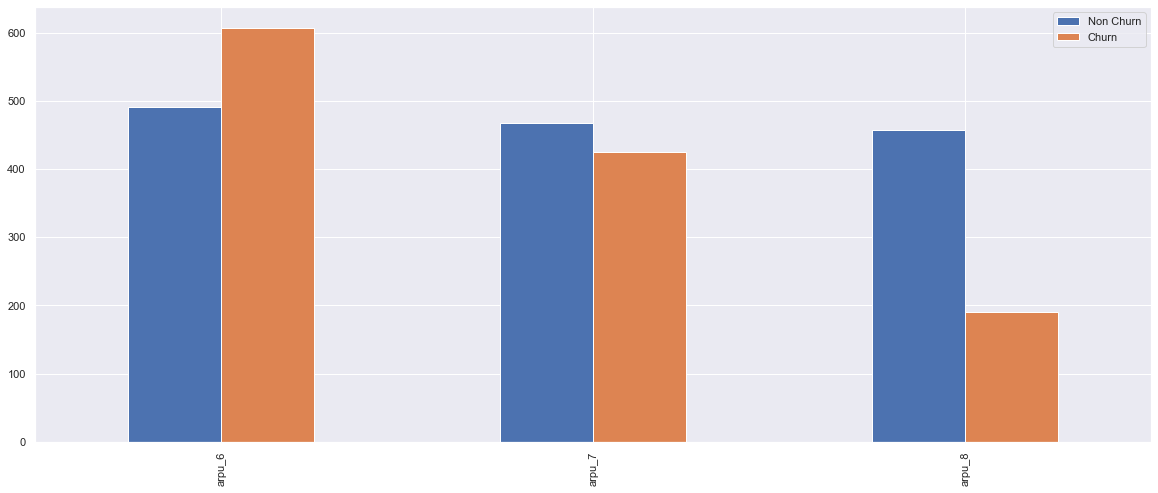

,arpu_6,arpu_7,arpu_8
Non Churn,490.186348,466.781269,456.733971
Churn,607.203077,425.268488,190.693603


In [508]:
mean_bar_chart(master_df,arpu_cols)

### Observation: 
As we can see that Average revenue per user has been decreased significantly for churn customers, while it remains uniform for Non churn customers. 

## Onnet & offnet minutes of usage analysis

In [509]:
onnet_offnet_cols = master_df.columns[master_df.columns.str.contains('net.*mou',regex=True)]
onnet_offnet_cols.tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8']

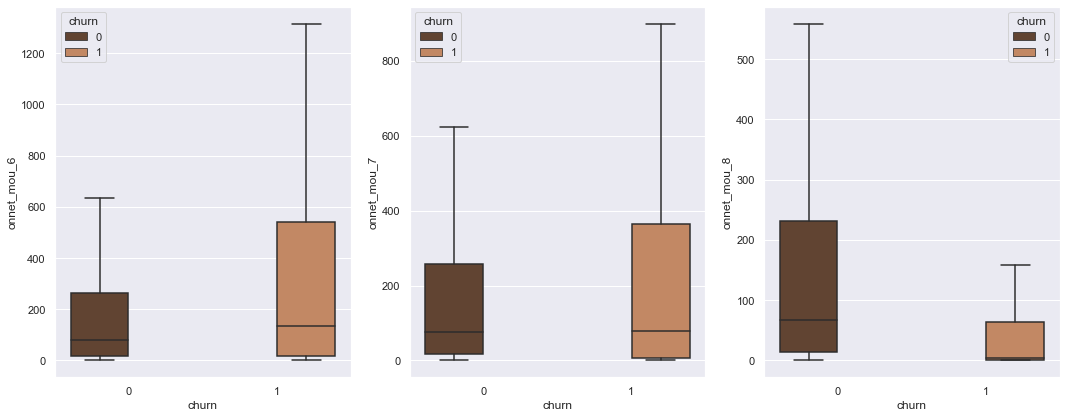

In [510]:
# Onnet analysis
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="onnet_mou_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="onnet_mou_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="onnet_mou_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

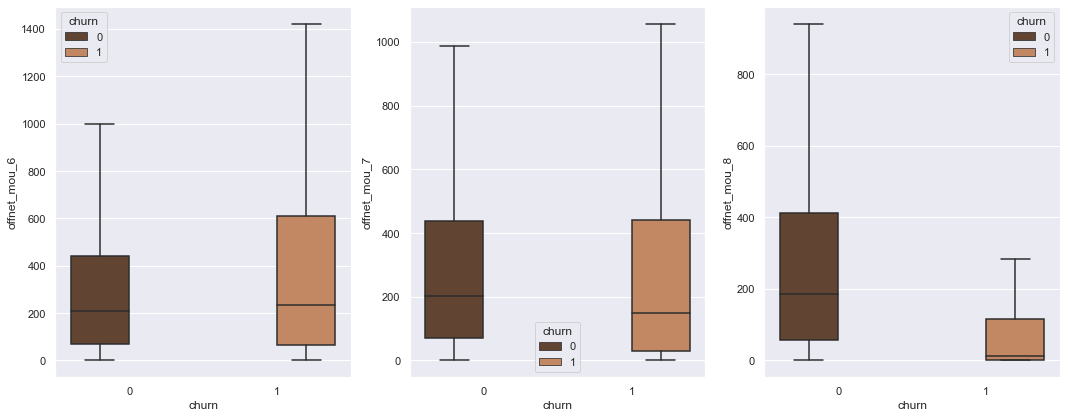

In [511]:
# Onnet analysis
plt.figure(figsize=(18, 15))
plt.subplot(2,3,1)
sns.boxplot(data=master_df, y="offnet_mou_6",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,2)
sns.boxplot(data=master_df, y="offnet_mou_7",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.subplot(2,3,3)
sns.boxplot(data=master_df, y="offnet_mou_8",x="churn",hue="churn",
                showfliers=False,palette=("copper"))
plt.show()

### Average churn in onnet/offnet variables

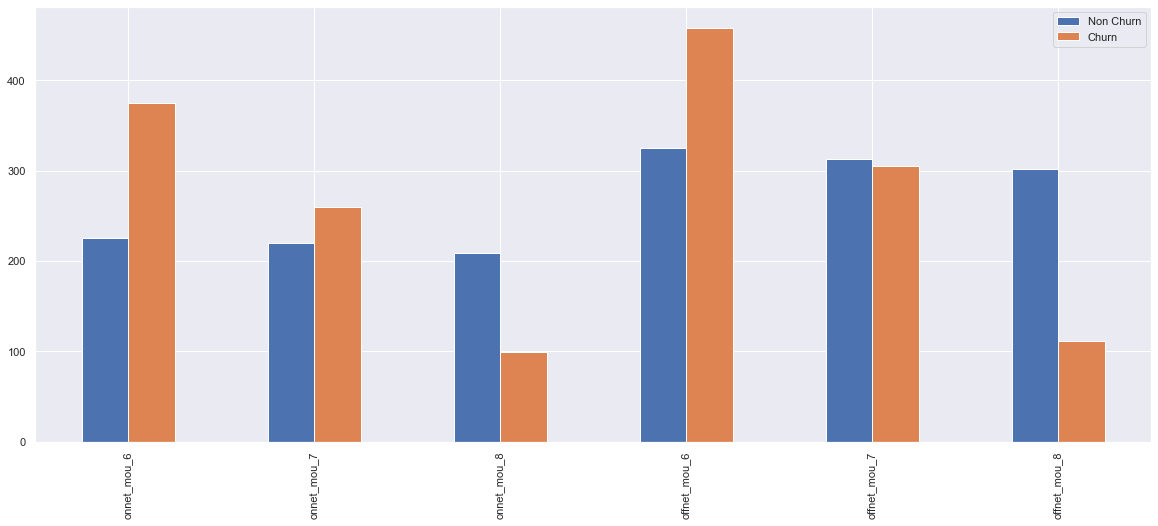

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,225.382882,219.732258,208.470081,324.995818,312.955835,301.778861
Churn,374.996059,260.003773,99.002764,458.603436,305.567613,111.621748


In [512]:
mean_bar_chart(master_df, onnet_offnet_cols)

### Observation: 
As we can see that from above graph and table onnet and offnet usage has been significantly decreased for Churn customers.

## Tenure of customers : toc

In [513]:
toc_data = master_df
toc_data['tenure'] = toc_data['aon']/30
toc_range = [0, 3, 6, 12, 24, 60, 61]
toc_label = [ '0-3 Months', '3-6 Months', '6-12 Months', '1-2 Years', '2-5 Years', '5 Years and above']
toc_data['toc_range'] = pd.cut(toc_data['tenure'], toc_range, labels=toc_label)
toc_data['toc_range'].head()

0       2-5 Years
7       2-5 Years
8     6-12 Months
21      1-2 Years
38      2-5 Years
Name: toc_range, dtype: category
Categories (6, object): ['0-3 Months' < '3-6 Months' < '6-12 Months' < '1-2 Years' < '2-5 Years' < '5 Years and above']

### Average churn in toc

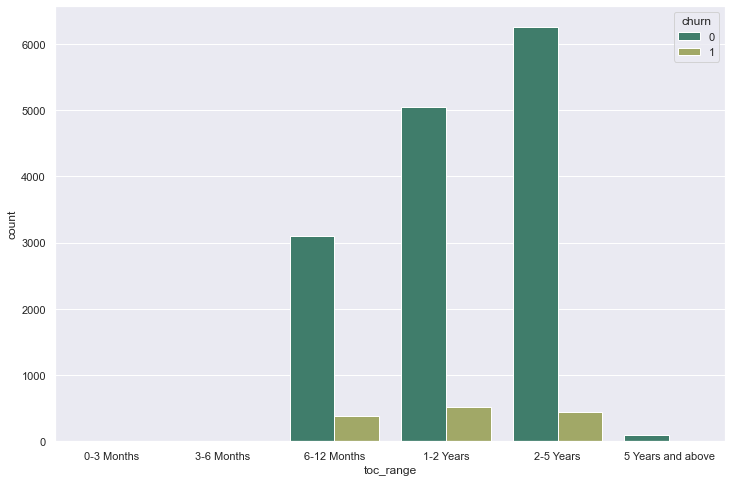

In [514]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'toc_range', hue = 'churn',data = toc_data,palette=("gist_earth"))
plt.show()

### Observation:
- There is no new customers since last 6 months.
- There are no customers who is using the service since more than 5 years are going to churn.

# Derive new features

In [515]:
# Lets check dataset
master_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,avg_total_rech_amt_goodph,churn,tenure,toc_range
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1,32.266667,2-5 Years
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1,26.733333,2-5 Years
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0,10.500000,6-12 Months
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,

## Date Variables

In [516]:
from datetime import datetime
# Lets store 1st Sept as datetime object
datetime_object = datetime.strptime('2014-09-1', '%Y-%m-%d')
(datetime_object - master_df['date_of_last_rech_6']).dt.days

0        72
7        66
8        68
21       63
38       63
         ..
99965    63
99970    63
99981    76
99984    72
99988    63
Name: date_of_last_rech_6, Length: 20823, dtype: int64

In [517]:
# Lets find days since last recharge as we cannot feed date variables directly to model, hence we are subtracting the date from 1 Sept
master_df['days_since_last_rech6'] = (datetime_object - master_df['date_of_last_rech_6']).dt.days
master_df['days_since_last_rech7'] = (datetime_object - master_df['date_of_last_rech_7']).dt.days
master_df['days_since_last_rech8'] = (datetime_object - master_df['date_of_last_rech_8']).dt.days
date_cols.remove('date_of_last_rech_6')
date_cols.remove('date_of_last_rech_8')
date_cols.remove('date_of_last_rech_7')
date_cols.append('days_since_last_rech6')
date_cols.append('days_since_last_rech7')
date_cols.append('days_since_last_rech8')
master_df[date_cols].head()

,days_since_last_rech6,days_since_last_rech7,days_since_last_rech8
0,72,47,24
7,66,38,6
8,68,32,2
21,63,32,1
38,63,35,8


In [518]:
# Drop the date columns
master_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [519]:
# Dropping average recharge of 6th and 7th month that we calculated to iddentify 70th percentile
master_df.drop(["avg_total_rech_amt_goodph"],axis=1,inplace=True)
master_df.drop(["toc_range"],axis=1,inplace=True)

In [520]:
master_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_data_6,total_amt_data_7,total_amt_data_8,churn,tenure,days_since_last_rech6,days_since_last_rech7,days_since_last_rech8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,1,32.266667,72,47,24
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,26.733333,66,38,6
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,354.0,207.0,0,10.500000,68,32,2
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.0

## Average of 6th and 7th months variables

In [521]:
# create a new column, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
list_col_6th_7th = master_df.filter(regex='_6|_7').columns.str[:-2]
list_col_6th_7th.unique()

print(master_df.shape)

# lets calculate the average now
for idx, col in enumerate(list_col_6th_7th.unique()):
    avg_col_name = "Avrg_"+col+"_of67" # lets create the column name dynamically
    col_of_6 = col+"_6"
    col_of_7 = col+"_7"
    master_df[avg_col_name] = (master_df[col_of_6]  + master_df[col_of_7])/ 2

(20823, 127)


In [522]:
# Lets drop 6th and 7th month columns
list_of_columns_to_drop = master_df.filter(regex='_6|_7')
master_df.drop(list_of_columns_to_drop,axis=1,inplace=True)
print (master_df.shape)

(20823, 87)


### Store Categorical variables

In [523]:
categorical_vars = list(master_df.columns[master_df.columns.str.contains('monthly')])

# Modeling

## Encoding 
In this section we will encoding the categorical variables 

In [524]:
# Lets check the value counts for categorical variables
for i in categorical_vars:
    print(master_df[i].value_counts())

0    17734
1     2805
2      261
3       19
4        4
Name: monthly_2g_8, dtype: int64
0    18463
1     1856
2      420
3       60
4       20
5        3
6        1
Name: monthly_3g_8, dtype: int64
0.0    16116
0.5     2246
1.0     1823
1.5      577
2.0       48
2.5       10
3.0        3
Name: Avrg_monthly_2g_of67, dtype: int64
0.0    17364
0.5     1818
1.0     1265
1.5      312
2.0       50
2.5        8
3.0        3
3.5        2
4.0        1
Name: Avrg_monthly_3g_of67, dtype: int64


### Observation
- We see that the monthly variables are discrete in numbers and also follow a order, hence it needs to be label encoded

In [525]:
# Since it follows an order as monthly recharges is number and more the recharges, more is the value for it, hence label encode it
for i in categorical_vars:
    l_encoder = LabelEncoder()
    master_df[i] = l_encoder.fit_transform(master_df[i])
    print(master_df[i].value_counts())

0    17734
1     2805
2      261
3       19
4        4
Name: monthly_2g_8, dtype: int64
0    18463
1     1856
2      420
3       60
4       20
5        3
6        1
Name: monthly_3g_8, dtype: int64
0    16116
1     2246
2     1823
3      577
4       48
5       10
6        3
Name: Avrg_monthly_2g_of67, dtype: int64
0    17364
1     1818
2     1265
3      312
4       50
5        8
6        3
7        2
8        1
Name: Avrg_monthly_3g_of67, dtype: int64


## Split the dataset

In [526]:
# Convert categorical variables to numeric
master_df[categorical_vars] = master_df[categorical_vars].astype(int)

In [527]:
# Checkpoint , take backup
df = master_df.copy()

### Split Train and Test dataset into X & Y

In [528]:
y = df.pop('churn')
X = df
# Split using sklearn's train_test_split with random state 0 and split size 70 30
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state = 0)
# Check the shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14576, 86), (6247, 86), (14576,), (6247,))

## Standardizing
In this section we will be using the standard scaler to scale all the variables so that everything is on same scale

In [529]:
# Create STandard Scaler Object
scaler = StandardScaler()
# Fit the scaler and transform Training Dataset
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
# Using fitted scaler above, transform Test Set
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_amt_data_8,tenure,days_since_last_rech6,days_since_last_rech7,days_since_last_rech8,Avrg_arpu_of67,Avrg_onnet_mou_of67,Avrg_offnet_mou_of67,Avrg_roam_ic_mou_of67,Avrg_roam_og_mou_of67,Avrg_loc_og_t2t_mou_of67,Avrg_loc_og_t2m_mou_of67,Avrg_loc_og_t2f_mou_of67,Avrg_loc_og_t2c_mou_of67,Avrg_loc_og_mou_of67,Avrg_std_og_t2t_mou_of67,Avrg_std_og_t2m_mou_of67,Avrg_std_og_t2f_mou_of67,Avrg_std_og_mou_of67,Avrg_spl_og_mou_of67,Avrg_og_others_of67,Avrg_total_og_mou_of67,Avrg_loc_ic_t2t_mou_of67,Avrg_loc_ic_t2m_mou_of67,Avrg_loc_ic_t2f_mou_of67,Avrg_loc_ic_mou_of67,Avrg_std_ic_t2t_mou_of67,Avrg_std_ic_t2m_mou_of67,Avrg_std_ic_t2f_mou_of67,Avrg_std_ic_mou_of67,Avrg_total_ic_mou_of67,Avrg_spl_ic_mou_of67,Avrg_isd_ic_mou_of67,Avrg_ic_others_of67,Avrg_total_rech_num_of67,Avrg_max_rech_amt_of67,Avrg_last_day_rch_amt_of67,Avrg_vol_2g_mb_of67,Avrg_vol_3g_mb_of67,Avrg_monthly_2g_of67,Avrg_sachet_2g_of67,Avrg_monthly_3g_of67,Avrg_sachet_3g_of67,Avrg_vbc_3g_of67,Avrg_total_amt_data_of67
93499,-0.038510,0.254562,0.767895,-0.182925,-0.214456,1.949621,2.466377,-0.293531,-0.300167,2.677231,-0.421912,-0.428589,-0.138215,-0.570084,-0.078959,-0.337029,-0.023045,0.714768,0.526513,0.020610,-0.220111,0.206540,-0.165087,0.217988,-0.221793,0.065131,0.182507,-0.254718,-0.198874,-0.176607,-0.829661,0.916599,1.642744,-0.379246,-0.433658,-0.399630,-0.457893,-0.322652,-0.199392,1.960966,-0.421953,-0.313710,1.960966,-0.105497,0.478707,0.309255,-0.023757,0.111322,0.767660,-0.255238,-0.298659,1.922791,2.577920,0.037193,-0.388468,2.788826,-0.499831,-0.531988,-0.160754,-0.703188,0.001242,-0.30895,0.649992,0.747498,-0.196106,-0.114594,0.159738,-0.406671,-0.536673,0.618119,-0.534533,0.009111,-0.441986,-0.247335,-0.246321,-0.866624,1.121245,0.585797,-0.489449,-0.504615,-0.483691,-0.536670,-0.398632,-0.321809,-0.471908,-0.613902
99345,-0.410972,-0.503598,-0.690347,-0.182925,-0.214456,-0.272005,-0.565448,-0.371375,-0.300167,-0.551973,-0.421912,-0.431268,-0.138215,-0.571862,-0.078959,-0.244969,-0.023045,-0.785134,1.419847,-0.435922,-0.248409,0.256289,-0.270875,0.137507,-0.221793,-0.048072,0.199617,-0.254718,-0.198874,-0.176607,1.445457,-0.717985,-0.546201,2.975418,-0.433534,-0.399630,3.571636,-0.322652,-0.199392,0.049393,-0.421953,1.990654,0.049393,-0.105497,-0.611752,-0.257134,-0.448429,-0.524250,-0.732309,-0.255238,-0.298659,-0.088329,-0.451913,-0.175499,-0.388468,-0.381091,-0.497239,-0.531050,-0.160754,-0.700748,-0.001617,-0.30895,-0.858540,0.745636,-0.121686,-0.141438,0.208021,-0.406671,-0.371898,-0.146880,-0.492156,0.064071,-0.441986,-0.247335,-0.246321,0.829969,-0.455365,-1.006753,3.806846,-0.504615,0.784345,0.934324,-0.398632,-0.321809,-0.471908,0.962735
35702,-0.779033,-0.583133,-0.498104,-0.182925,-0.214456,-0.505065,-0.181594,0.067234,-0.300167,-0.366760,-0.421912,-0.433885,-0.138215,-0.573598,-0.078959,-0.337029,-0.023045,-0.703669,-0.484287,-0.152985,-0.365514,-0.374943,-0.294148,-0.400797,-0.221793,-0.474749,-0.493006,-0.254718,-0.198874,-0.176607,-0.197684,-0.364106,-0.565658,-0.141308,-0.272088,-0.399630,-0.010167,-0.322652,-0.199392,-0.415189,-0.038559,-0.220431,-0.415189,0.997289,-0.829844,-0.823523,-1.149423,-0.685366,-0.750263,-0.255238,-0.298659,-0.588233,-0.479376,0.304262,-0.388468,-0.611510,-0.499831,-0.534375,-0.160754,-0.704767,-0.448019,-0.30895,-0.983699,-0.623198,-0.238142,-0.250794,-0.478081,-0.398498,-0.544215,-0.277709,-0.633340,-0.616562,-0.441986,-0.247335,-0.246321,-0.51

## Model for Interpretibilty

## Class Imbalance using Smote
- Synthetic Minority Oversampling Technique to solve imbalanced classification.

In [530]:
# Lets check class imbalance in Train Set
y_train.value_counts(normalize=True)*100

0    92.858123
1     7.141877
Name: churn, dtype: float64

### Observation 
- As we can above, there is high amount of data present for non churn when compared to churn customers. Hence we need to rectify this is using smote/class weights

In [531]:
# transform the dataset
over = SMOTE()
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over)]
# pipeline = Pipeline(steps=steps)
X_train_sm, y_train_sm = over.fit_resample(X_train, y_train)
print("Before sampling shape: ",X_train.shape, y_train.shape)
print("class distr\n",y_train.value_counts())
print("After sampling shape: ",X_train_sm.shape, y_train_sm.shape)
print("class distr\n",y_train_sm.value_counts())
# Lets Replace the previous data with re sampled data
X_train = X_train_sm
y_train = y_train_sm

Before sampling shape:  (14576, 86) (14576,)
class distr
 0    13535
1     1041
Name: churn, dtype: int64
After sampling shape:  (27070, 86) (27070,)
class distr
 1    13535
0    13535
Name: churn, dtype: int64


## Logistic Regression Model
- Lets Run a logistic regression model on the new re sampled dataset using Lasso

In [532]:
# Initialize Logistic Regression Model
# We are using solver as saga as there are lot of records, lasso Regularization, 
# class weight as balanced to handle class imbalance problem
logistic_model = LogisticRegression(solver='saga',penalty='l1',class_weight='balanced',n_jobs=-1,random_state=0)

# Initialize Alpha/Lambda values
#params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, ]}
params = {'C': [1,5,10,11,12,13,14,15,16,17,18,19,20]}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=logistic_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1,n_jobs=-1)

# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  1.3min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.191001,0.178286,0.009396,0.003805,1,{'C': 1},0.850203,0.864980,0.862024,0.859254,0.859069,0.859106,0.004946,1,0.863502,0.858746,0.858792,0.859854,0.861563,0.860491,0.001819
1,8.192697,1.133807,0.008744,0.002947,5,{'C': 5},0.849834,0.864795,0.862024,0.859438,0.859069,0.859032,0.005039,13,0.863502,0.858746,0.858607,0.859900,0.861378,0.860427,0.001832
2,9.493569,0.064378,0.009148,0.002025,10,{'C': 10},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858607,0.859900,0.861332,0.860417,0.001827
3,9.456795,0.110938,0.008769,0.004174,11,{'C': 11},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858607,0.859900,0.861332,0.860417,0.001827
4,9.609641,0.178177,0.006873,0.000834,12,{'C': 12},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858607,0.859900,0.861332,0.860417,0.001827
5,10.110074,0.047224,0.006283,0.001123,13,{'C': 13},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858607,0.859900,0.861332,0.860417,0.001827
6,9.749024,0.298468,0.007681,0.002060,14,{'C': 14},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858653,0.859900,0.861332,0.860427,0.001818
7,9.578108,0.100095,0.007811,0.002201,15,{'C': 15},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858653,0.859900,0.861332,0.860427,0.001818
8,8.945639,0.108001,0.007567,0.001372,16,{'C': 16},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858653,0.859900,0.861332,0.860427,0.001818
9,8.881734,0.068046,0.008640,0.002626,17,{'C': 17},0.849834,0.864795,0.862024,0.859438,0.859254,0.859069,0.005039,2,0.863502,0.858746,0.858653,0.859900,0.861332,0.860427,0.001818


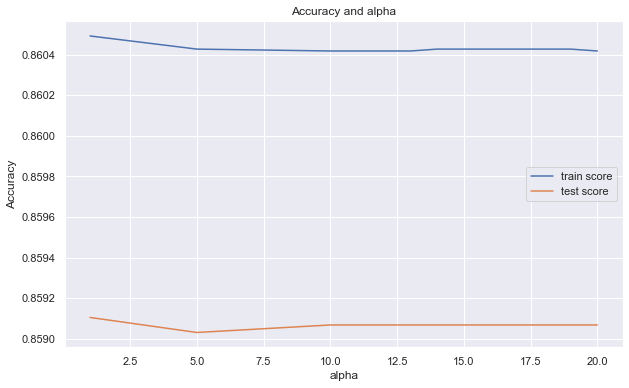

In [533]:
# plotting mean test and train scoes with alpha 
cv_results['param_C'] = cv_results['param_C'].astype('float32')

# plotting
plt.figure(figsize=[10,6])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title("Accuracy and alpha")
plt.legend(['train score', 'test score'], loc='best')
plt.show()

In [534]:
# Lets check the best value of inverse alpha
model_cv.best_params_

{'C': 1}

### Observation 
- As we can above the best hyper parameter for alpha value, lets store the logistic regression model and find the best predictors

In [535]:
# Initialize inverse Alpha
alpha = model_cv.best_params_['C']
# Use the best model from Grid search cv LogisticRegression Object
final_model = model_cv.best_estimator_
# Fit the LogisticRegression object to X Train        
final_model.fit(X_train, y_train)
# Create Features Dataframe
feature_df_l_new = pd.DataFrame({"features":X_train.columns,"coef": np.abs(final_model.coef_[0])})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_l = feature_df_l_new[feature_df_l_new.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
print(feature_df_sorted_l.shape[0])
feature_df_sorted_l.head(5)

86


,features,coef
0,spl_ic_mou_8,0.746012
1,vol_2g_mb_8,0.654323
2,last_day_rch_amt_8,0.651104
3,std_og_t2f_mou_8,0.579106
4,sachet_2g_8,0.569618


### Observation
- Lasso did not reduce the number of variables and it remained at 86 variables. Hence we may need to use RFE to reduce the variables to lesser number
- Lets change the regularization to ridge since lasso did not reduce the variable  

## Feature Selection with RFE
- We are using ridge here as lasso takes lot of time and not doing feature selection much

In [536]:
# Initialize Logistic Regression
logreg = LogisticRegression(solver='saga',penalty='l2',class_weight='balanced',n_jobs=-1,random_state=0)
# Initialize Logistic Regression
rfe = RFE(logreg, 15) # running RFE with 15 variables as output
# lets fit the rfe object
rfe = rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_),columns=['Variable Name','Related','Rank'])
rfe_df[rfe_df.Related].reset_index().drop("index",axis=1)

,Variable Name,Related,Rank
0,loc_og_mou_8,True,1
1,og_others_8,True,1
2,loc_ic_mou_8,True,1
3,std_ic_t2t_mou_8,True,1
4,std_ic_t2f_mou_8,True,1
5,spl_ic_mou_8,True,1
6,total_rech_num_8,True,1
7,last_day_rch_amt_8,True,1
8,vol_2g_mb_8,True,1
9,vol_3g_mb_8,True,1


In [537]:
# lets store top variables
related_columns = rfe_df[rfe_df.Related]['Variable Name'].values.tolist()
related_columns

['loc_og_mou_8',
 'og_others_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'sachet_3g_8',
 'tenure',
 'days_since_last_rech8',
 'Avrg_arpu_of67',
 'Avrg_total_ic_mou_of67']

### Run Logistic Regression model on filtered RFE variables

In [538]:
# Initialize Logistic Regression Model
# We are using solver as saga as there are lot of records, lasso Regularization, 
# class weight as balanced to handle class imbalance problem
logistic_model = LogisticRegression(solver='saga',penalty='l2',class_weight='balanced',n_jobs=-1,random_state=0)

# Initialize Alpha/Lambda values
params = {'C': [ 0.01, 0.1,1,2,3,4,5,6,7,10,11]}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=logistic_model, param_grid=params,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1)

# Fit the model to X and y
model_cv.fit(X_train[related_columns],y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   53.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.910665,0.103152,0.005031,0.001969,0.01,{'C': 0.01},0.839306,0.855929,0.851681,0.852604,0.849649,0.849834,0.005641,11,0.852697,0.848864,0.849603,0.848679,0.850296,0.850028,0.001452
1,0.931768,0.006289,0.004177,0.001130,0.1,{'C': 0.1},0.839860,0.855375,0.853343,0.853158,0.851681,0.850683,0.005538,10,0.854174,0.849280,0.850942,0.849972,0.850942,0.851062,0.001678
2,0.978009,0.033459,0.003815,0.000514,1,{'C': 1},0.840044,0.855929,0.853158,0.853343,0.851311,0.850757,0.005555,1,0.853897,0.848910,0.851127,0.849926,0.850850,0.850942,0.001670
3,0.947151,0.017108,0.004688,0.001430,2,{'C': 2},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849003,0.851034,0.850018,0.850850,0.850942,0.001602
4,0.962249,0.011950,0.004072,0.001369,3,{'C': 3},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851081,0.850018,0.850850,0.850960,0.001591
5,0.974472,0.026094,0.003476,0.000638,4,{'C': 4},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851034,0.850018,0.850803,0.850942,0.001591
6,1.000631,0.021056,0.003223,0.000531,5,{'C': 5},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851034,0.849926,0.850803,0.850924,0.001602
7,0.980281,0.083762,0.003713,0.000417,6,{'C': 6},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851034,0.849926,0.850803,0.850924,0.001602
8,1.005566,0.055517,0.003429,0.000151,7,{'C': 7},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851034,0.849926,0.850850,0.850933,0.001602
9,0.936522,0.022369,0.003363,0.000406,10,{'C': 10},0.840044,0.855929,0.852974,0.853343,0.851311,0.850720,0.005539,2,0.853805,0.849049,0.851034,0.849880,0.850850,0.850924,0.001608


In [539]:
# Best alpha value
model_cv.best_params_

{'C': 1}

### Observation 
- As we can above the best hyper parameter for alpha value, lets store the logistic regression model for the best alpha value and find the best predictors

In [540]:
# get the best model having alpha 1
final_model = model_cv.best_estimator_
# Create Features Dataframe
feature_df_l_new = pd.DataFrame({"features":X_train[related_columns].columns,"coef": np.abs(final_model.coef_[0])})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_l = feature_df_l_new[feature_df_l_new.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
print("Number of features selected",feature_df_sorted_l.shape[0])
print("Important features are below")
feature_df_sorted_l

Number of features selected 15
Important features are below


,features,coef
0,loc_ic_mou_8,1.815146
1,vol_2g_mb_8,0.865945
2,spl_ic_mou_8,0.804914
3,last_day_rch_amt_8,0.660479
4,loc_og_mou_8,0.653392
5,total_rech_num_8,0.571735
6,vol_3g_mb_8,0.536601
7,days_since_last_rech8,0.475861
8,Avrg_total_ic_mou_of67,0.462621
9,std_ic_t2f_mou_8,0.458258


### Observation 
- loc_ic_mou_8,spl_ic_mou_8,vol_2g_mb_8,total_og_mou_8,loc_og_mou_8 are the top 5 variables irrespective of there sign. Hence lets remove the absolute function and check the coefficients

In [541]:
# No abs() function
feature_df_l_new_1 = pd.DataFrame({"features":X_train[related_columns].columns,"coef": final_model.coef_[0]})
# Sort the features based on absoulte values of coefficeints
feature_df_sorted_l = feature_df_l_new_1[feature_df_l_new_1.coef!=0].sort_values(by='coef',ascending=False).reset_index().drop('index',axis=1)
print("Number of features selected",feature_df_sorted_l.shape[0])
print("Important features are below")
feature_df_sorted_l

Number of features selected 15
Important features are below


,features,coef
0,days_since_last_rech8,0.475861
1,Avrg_total_ic_mou_of67,0.462621
2,Avrg_arpu_of67,0.410575
3,std_ic_t2t_mou_8,-0.347326
4,og_others_8,-0.369857
5,tenure,-0.410293
6,sachet_3g_8,-0.436267
7,std_ic_t2f_mou_8,-0.458258
8,vol_3g_mb_8,-0.536601
9,total_rech_num_8,-0.571735


### Observation 
As we can see from above Important variables list:
- **Local incoming minutes**(loc_ic_mou_8)  of usage in 8th month is strong predictor of whether customer will churn or not along with **special incoming minutes of usage** . If these variables decreases customer more chance that he/she will likely to churn.
- **last_day_rch_amt_8** : date when last recharge is done is also good predictor, as if the customer has not done any recharge since long time, then he is likely to churn.
- Also if **Total outgoing minutes of usage** has reduced in 8th month, customer is likely to churn.
- Also if **2g & 3g services** like internet, volume based internet cost(vbc), services scheme with less than one month validity(sachet) are also strong predictors, lesser the value of them , more likely the customer will churn.

In [542]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[related_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[related_columns].values, i) for i in range(X_train[related_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,3.58
14,Avrg_total_ic_mou_of67,2.38
0,loc_og_mou_8,2.32
6,total_rech_num_8,1.54
12,days_since_last_rech8,1.33
7,last_day_rch_amt_8,1.29
11,tenure,1.23
13,Avrg_arpu_of67,1.20
9,vol_3g_mb_8,1.17
10,sachet_3g_8,1.13


### Observation 
- we can see that there are no variables having high VIF value, hence lets not remove any

In [543]:
final_model = model_cv.best_estimator_
final_model.classes_

array([0, 1])

In [544]:
y_train_pred = final_model.predict(X_train[related_columns])
y_train_pred_prob = final_model.predict_proba(X_train[related_columns])[:,1]
y_train_pred,y_train_pred_prob

(array([0, 0, 0, ..., 1, 1, 1]),
 array([0.01077059, 0.00770682, 0.28047878, ..., 0.92717621, 0.89604223,
        0.90085685]))

In [545]:
# Let's check the overall accuracy of train.
print(accuracy_score(y_train,y_train_pred))

0.8511267085334319


In [546]:
# lets predict on test set
y_test_pred = final_model.predict(X_test[related_columns])
# Let's check the overall accuracy of test.
print(accuracy_score(y_test,y_test_pred))

0.8125500240115255


### Observation 
- We can see that train accuracy is 0.85 and test accuracy is 0.82 which are very close. Hence we can conclude that there is no overfitting in the model

# Evaluation of Model

In [547]:
# Confusion matrix of Train set
confusion = confusion_matrix(y_train,y_train_pred)
print(confusion)

[[11206  2329]
 [ 1701 11834]]


### Precision and Recall

In [548]:
print(classification_report(y_train, y_train_pred, labels=final_model.classes_))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     13535
           1       0.84      0.87      0.85     13535

    accuracy                           0.85     27070
   macro avg       0.85      0.85      0.85     27070
weighted avg       0.85      0.85      0.85     27070



### Observation
- We can see that precision is 84 and recall is 88 on train set which are pretty good 

### Sensitivity and specificity 

In [549]:
# lets define a fucntion to get other accuracy like Sensitivity,specificity
def get_other_accuracy(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity",TP / float(TP+FN))
    print("specificity",TN / float(TN+FP))
    print("false postive rate -predicting churn when customer does not have churned ",FP/ float(TN+FP))

In [550]:
# Train
print("Training Data")
# Confusion matrix of Train set
confusion = confusion_matrix(y_train,y_train_pred)
get_other_accuracy(confusion)

Training Data
Sensitivity 0.8743258219431105
specificity 0.8279275951237532
false postive rate -predicting churn when customer does not have churned  0.17207240487624675


In [551]:
# test
# Confusion matrix of Test set
print("Test Data")
confusion = confusion_matrix(y_test,y_test_pred)
get_other_accuracy(confusion)

Test Data
Sensitivity 0.8340807174887892
specificity 0.8108946733321841
false postive rate -predicting churn when customer does not have churned  0.1891053266678159


### Observation 
- As we can see above that our sensitivity score is more which means that our model likely to predict Churn Customers correctly. 
- Also Specificity is bit low which is ok in our case because we would like to predict churn  

### ROC Curve

In [552]:
# Draw ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [553]:
fpr, tpr, thresholds = roc_curve( y_train,y_train_pred, drop_intermediate = False )
fpr, tpr, thresholds

(array([0.       , 0.1720724, 1.       ]),
 array([0.        , 0.87432582, 1.        ]),
 array([2, 1, 0]))

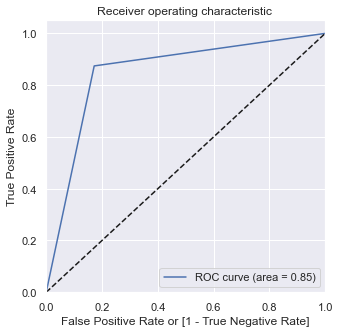

In [554]:
# Train set ROC Curve
draw_roc(y_train,y_train_pred )

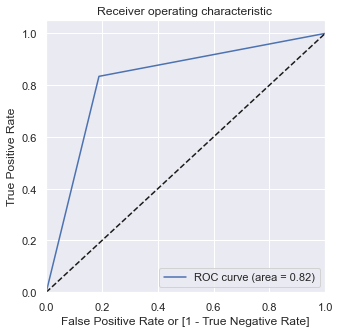

In [555]:
# Test set ROC Curve
draw_roc(y_test,y_test_pred )

### Observation
- We see that Area under curve is more and line is more inclined towards True Positive rate. Hence we can say that our model has performed good on Train as well as test data

### Probabilty Cutoff

In [556]:
# Let's create columns with different probability cutoffs 
y_train_pred_final = pd.DataFrame({"churn_prob":y_train_pred_prob,"churn_pred":y_train_pred,"churn_actual":y_train})
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final

,churn_prob,churn_pred,churn_actual,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.010771,0,0,1,0,0,0,0,0,0,0,0,0
1,0.007707,0,0,1,0,0,0,0,0,0,0,0,0
2,0.280479,0,0,1,1,1,0,0,0,0,0,0,0
3,0.000026,0,0,1,0,0,0,0,0,0,0,0,0
4,0.028993,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27065,0.921050,1,1,1,1,1,1,1,1,1,1,1,1
27066,0.792170,1,1,1,1,1,1,1,1,1,1,0,0
27067,0.927176,1,1,1,1,1,1,1,1,1,1,1,1
27068,0.896042,1,1,1,1,1,1,1,1,1,1,1,0


In [557]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn_actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.723162  0.977983  0.468341
0.2   0.2  0.783155  0.961581  0.604728
0.3   0.3  0.814703  0.934097  0.695308
0.4   0.4  0.837865  0.907868  0.767861
0.5   0.5  0.851127  0.874326  0.827928
0.6   0.6  0.852567  0.830144  0.874991
0.7   0.7  0.835833  0.757739  0.913927
0.8   0.8  0.784854  0.622386  0.947322
0.9   0.9  0.652272  0.326265  0.978279


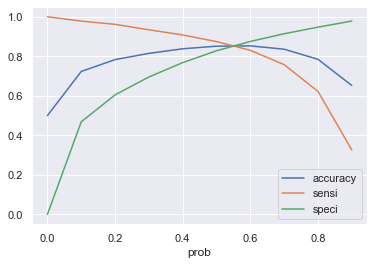

In [558]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observation 
- As we can see from the above graphs, the point of intersection is around 0.5 and the default probabilty cutoff taken by logistic regression model is also 0.5. Hence its not necessary to change the cutoff and the previous result of accuracy remains the same

# Modeling for Better Prediction

## Dimensionality  Reduction
We did not perform PCA on logistic regression because, we wanted better interpretibilty of the model there. Hence lets do PCA now for better prediction of model

### PCA

In [559]:
# import PCA
from sklearn.decomposition import PCA
# initialize PCA Object
pca = PCA(random_state=42)
# Fit the PCA object on Training data
pca.fit(X_train)

PCA(random_state=42)

In [560]:
print("Explained variance")
pca.explained_variance_ratio_*100

Explained variance


array([1.22334430e+01, 1.05243754e+01, 5.41296679e+00, 4.91013052e+00,
       4.40523875e+00, 4.10512081e+00, 3.52050062e+00, 3.06932629e+00,
       2.85531924e+00, 2.66943005e+00, 1.96754695e+00, 1.87242364e+00,
       1.79931015e+00, 1.70592593e+00, 1.64013327e+00, 1.59968916e+00,
       1.53339541e+00, 1.45712732e+00, 1.40731389e+00, 1.32027540e+00,
       1.29900805e+00, 1.25703580e+00, 1.23122264e+00, 1.20212481e+00,
       1.17576775e+00, 1.10858240e+00, 1.09198465e+00, 1.01348384e+00,
       1.00838895e+00, 9.32504944e-01, 9.20478621e-01, 8.91531167e-01,
       8.74857972e-01, 8.35841181e-01, 8.23659293e-01, 8.05642547e-01,
       7.89458263e-01, 7.82698863e-01, 7.67429939e-01, 7.30153162e-01,
       6.92423988e-01, 6.60997935e-01, 6.24095349e-01, 5.81581476e-01,
       5.65863171e-01, 5.59854666e-01, 5.39417250e-01, 5.13159274e-01,
       4.93043418e-01, 4.72231330e-01, 4.54034947e-01, 4.18090583e-01,
       4.12906320e-01, 3.32524702e-01, 3.05817913e-01, 2.95392138e-01,
      

In [561]:
# Calculate cummalative variance ratio
print("Calculate cummalative variance ratio")
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Calculate cummalative variance ratio


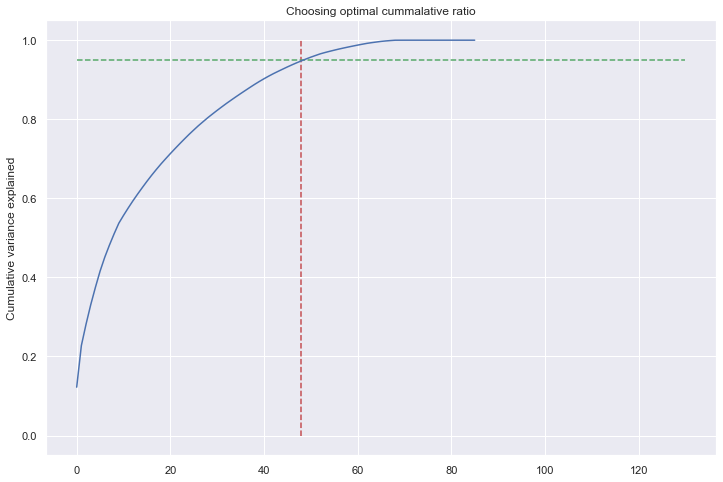

In [562]:
fig = plt.figure(figsize=[12,8])
plt.title("Choosing optimal cummalative ratio")
plt.vlines(x=48, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Observation 
- We can see that ideal number of components is 48. Hence lets create 48 components

### Increamental PCA
Lets create final principal components using Incremental pca as its faster

In [563]:
# create IncrementalPCA
pca_final = IncrementalPCA(n_components=48)
# Transform Train dataset
X_train = pca_final.fit_transform(X_train)
# Transform Test dataset
X_test = pca_final.transform(X_test)

## Random Forest
Lets evaluate Random Forest Ensemble Model on our dataset to build a better predictive model. We will be using the re sampled data generated by Smote and also the PCA transformed data to yield better result and remove multi collinearity if present. 

In [564]:
# Check class distribution again
y_train.value_counts()

1    13535
0    13535
Name: churn, dtype: int64

### Default Random Forest Model

In [565]:
# Initialize the default random forest object
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)
# Making predictions on train and test
y_train_rfc = rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

### Evaluation of Model

In [566]:
# Let's check the report of our default model
print(classification_report(y_train,y_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13535
           1       1.00      1.00      1.00     13535

    accuracy                           1.00     27070
   macro avg       1.00      1.00      1.00     27070
weighted avg       1.00      1.00      1.00     27070



In [567]:
# Let's check the report of our default model
print(classification_report(y_test,y_test_rfc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5801
           1       0.49      0.51      0.50       446

    accuracy                           0.93      6247
   macro avg       0.73      0.74      0.73      6247
weighted avg       0.93      0.93      0.93      6247



In [568]:
# Build confusion matrix
confusion = confusion_matrix(y_test,y_test_rfc)
# get Sensitivity and specificity
get_other_accuracy(confusion)

Sensitivity 0.5134529147982063
specificity 0.9589725909325978
false postive rate -predicting churn when customer does not have churned  0.041027409067402175


### Observation
- We see that precision and recall score is more for predicting non churn when compared to churn in the Test Data. 
- Also the test scores are less than train scores, hence the model has overfitted. 
- Even the sensitivity is less and specificity is more. Hence the default will be more baised towards predicting non churn customers
- Since this is trained on default Random forest Model(hyperparameters set to default), hence the scores are less. In Next steps lets tune the hyperparameter to prevent overfitting. 

### Tuning Hyperparameters in Random Forest
### Max depth 

In [569]:
# Initialize Random FOrest Classifier Model
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)

# Initialize max_depth
parameters = {'max_depth': range(5, 40, 5)}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

# Create Grid Search CV
model_cv = GridSearchCV(estimator=rfc, param_grid=parameters,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1,n_jobs=-1)

# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  2.0min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.870643,0.166181,0.120375,0.003218,5,{'max_depth': 5},0.833949,0.861286,0.853343,0.854451,0.851681,0.850942,0.009104,7,0.863133,0.857684,0.857176,0.855837,0.859392,0.858644,0.002517
1,21.338728,0.981891,0.120233,0.001931,10,{'max_depth': 10},0.915220,0.927595,0.925933,0.924640,0.918729,0.922423,0.004680,6,0.949575,0.950499,0.949668,0.949945,0.949113,0.949760,0.000456
2,27.139888,0.376198,0.118058,0.001933,15,{'max_depth': 15},0.951053,0.956409,0.956779,0.952715,0.949021,0.953195,0.003014,5,0.982915,0.983192,0.982499,0.983330,0.983330,0.983053,0.000316
3,29.800008,0.130993,0.118701,0.000874,20,{'max_depth': 20},0.957518,0.963059,0.962874,0.958626,0.959180,0.960251,0.002281,4,0.992381,0.992981,0.992566,0.992150,0.992242,0.992464,0.000294
4,32.529227,0.437056,0.121096,0.004881,25,{'max_depth': 25},0.961396,0.963613,0.966199,0.961581,0.959549,0.962468,0.002266,3,0.995290,0.996260,0.996444,0.996121,0.996075,0.996038,0.000396
5,33.639191,0.797578,0.122138,0.009447,30,{'max_depth': 30},0.962135,0.963798,0.965829,0.964352,0.960658,0.963354,0.001793,2,0.998384,0.998569,0.998384,0.998753,0.998338,0.998485,0.000156
6,24.760089,5.627660,0.118209,0.006382,35,{'max_depth': 35},0.964352,0.965091,0.966199,0.963798,0.962874,0.964463,0.001130,1,0.999954,1.000000,0.999954,0.999908,0.999584,0.999880,0.000151


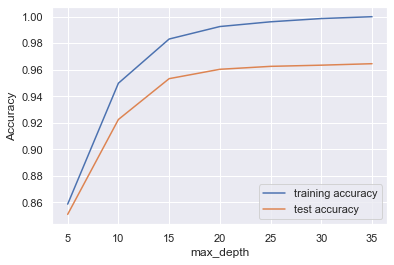

In [570]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_max_depth"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Observation 
- We can see from the graph that max_depth of 15 is more ideal as both test and train show elbow characteristics here and accuracy is also more than 95%.

### Max Features

In [571]:
# lets choose max depth as 15
max_depth=15

parameters = {'max_features': range(12, 20, 2)}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

rfc = RandomForestClassifier(max_depth=max_depth,random_state=0,n_jobs=-1)
model_cv = GridSearchCV(estimator=rfc, param_grid=parameters,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1,n_jobs=-1)
# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,54.143841,0.038049,0.181903,0.051175,12,{'max_features': 12},0.952530,0.954562,0.956225,0.952161,0.950129,0.953122,0.002094,2,0.985085,0.984716,0.984623,0.986055,0.985131,0.985122,0.000507
1,64.337901,1.483769,0.120392,0.002662,14,{'max_features': 14},0.951976,0.954193,0.956963,0.953639,0.950683,0.953491,0.002133,1,0.984900,0.984623,0.985085,0.985639,0.984946,0.985039,0.000336
2,76.532874,0.696055,0.140172,0.041017,16,{'max_features': 16},0.952161,0.953454,0.955116,0.951976,0.950314,0.952604,0.001604,4,0.984993,0.984623,0.985177,0.986008,0.985778,0.985316,0.000509
3,51.750588,15.142926,0.114143,0.004591,18,{'max_features': 18},0.950683,0.953454,0.957887,0.953085,0.948282,0.952678,0.003200,3,0.984669,0.985039,0.985223,0.985685,0.985916,0.985307,0.000447


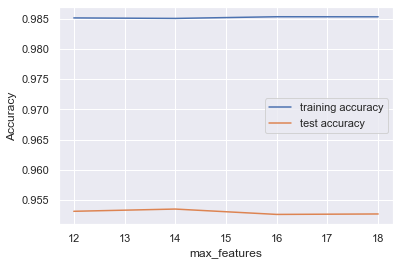

In [572]:
# plotting accuracies with max_features
plt.figure()
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_max_features"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Observation 
- We can see from the above graph that best value for max_features is 14. Hence lets set max_features as 14

### Number of estimators

In [573]:
# lets choose max features as 14
max_features=14
parameters = {'n_estimators': range(90, 150, 10)}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

rfc = RandomForestClassifier(max_depth=max_depth,max_features=max_features,random_state=0,n_jobs=-1)
model_cv = GridSearchCV(estimator=rfc, param_grid=parameters,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1,n_jobs=-1)
# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,53.397199,0.229477,0.120239,0.002795,90,{'n_estimators': 90},0.952900,0.954193,0.957148,0.953823,0.950868,0.953786,0.002038,4,0.985547,0.984623,0.985177,0.985547,0.984808,0.985140,0.000377
1,57.962938,0.428403,0.132488,0.027545,100,{'n_estimators': 100},0.951976,0.954193,0.956963,0.953639,0.950683,0.953491,0.002133,6,0.984900,0.984623,0.985085,0.985639,0.984946,0.985039,0.000336
2,62.892699,0.692008,0.140340,0.041775,110,{'n_estimators': 110},0.952530,0.954932,0.957333,0.954193,0.951053,0.954008,0.002138,1,0.984900,0.984808,0.984854,0.985547,0.984993,0.985020,0.000270
3,79.445506,4.570100,0.119480,0.001609,120,{'n_estimators': 120},0.952161,0.955116,0.957148,0.954378,0.950683,0.953897,0.002264,2,0.985177,0.984808,0.984946,0.985962,0.984946,0.985168,0.000414
4,86.610581,7.996896,0.138176,0.041108,130,{'n_estimators': 130},0.951976,0.954747,0.957887,0.953454,0.950129,0.953639,0.002623,5,0.985316,0.984716,0.985085,0.986008,0.985177,0.985260,0.000424
5,67.700143,5.130270,0.137553,0.042143,140,{'n_estimators': 140},0.952346,0.954747,0.957518,0.953269,0.951238,0.953823,0.002176,3,0.984854,0.984900,0.984900,0.985778,0.985316,0.985150,0.000356


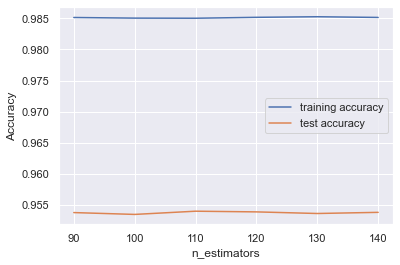

In [574]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_n_estimators"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Observation 
- at 130 estimators, we have got an optimal value for accuracy

### Criterion for making split in trees

In [575]:
# lets choose estimators as 130
estimators=130
parameters = {'criterion': ['gini','entropy']}
# Initialize cross validation folds to 5
folds = 5

# Initialize Scoring method as 'accuracy' as its easy to read for classification model
scoring_method = 'accuracy'

rfc = RandomForestClassifier(max_depth=max_depth,max_features=max_features,n_estimators=estimators,random_state=0,n_jobs=-1)
model_cv = GridSearchCV(estimator=rfc, param_grid=parameters,scoring=scoring_method, 
                        cv = folds, return_train_score=True,verbose = 1,n_jobs=-1)
# Fit the model to X and y
model_cv.fit(X_train,y_train)

# Store the results in DF
cv_results = pd.DataFrame(model_cv.cv_results_)
# Check the results of Grid Search CV
cv_results

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,84.573318,0.224949,0.142197,0.043356,gini,{'criterion': 'gini'},0.951976,0.954747,0.957887,0.953454,0.950129,0.953639,0.002623,2,0.985316,0.984716,0.985085,0.986008,0.985177,0.985260,0.000424
1,84.061405,31.099388,0.114252,0.004285,entropy,{'criterion': 'entropy'},0.954562,0.957702,0.962505,0.955301,0.956963,0.957407,0.002786,1,0.992473,0.992519,0.992704,0.993351,0.992242,0.992658,0.000376


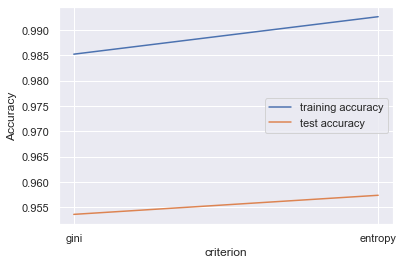

In [576]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(cv_results["param_criterion"], 
         cv_results["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results["param_criterion"], 
         cv_results["mean_test_score"], 
         label="test accuracy")
plt.xlabel("criterion")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Observation
- Since the accuracy is more for entropy rather than gini, hence lets choose entropy for building further model

### Final Model

In [577]:
# Lets build our final model with max_depth as 16, max_features as 14 and estimators = 130.
max_depth=16
max_features=14
estimators=130
criteria = 'entropy'
rfc = RandomForestClassifier(max_depth=max_depth,max_features=max_features,n_estimators=estimators,criterion=criteria,n_jobs=-1,random_state=0)
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

### Evaluation of Final Model

In [578]:
print("Training Set precision and recall")
print(classification_report(y_train,y_train_pred))

Training Set precision and recall
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13535
           1       0.99      1.00      0.99     13535

    accuracy                           0.99     27070
   macro avg       0.99      0.99      0.99     27070
weighted avg       0.99      0.99      0.99     27070



In [579]:
print("Test Set precision and recall")
print(classification_report(y_test,y_test_pred))

Test Set precision and recall
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5801
           1       0.46      0.64      0.54       446

    accuracy                           0.92      6247
   macro avg       0.72      0.79      0.75      6247
weighted avg       0.94      0.92      0.93      6247



In [580]:
# Test Set
confusion = confusion_matrix(y_test,y_test_pred)
print("Accuracy on test set",accuracy_score(y_test,y_test_pred))
get_other_accuracy(confusion)

Accuracy on test set 0.9217224267648472
Sensitivity 0.6367713004484304
specificity 0.9436304085502499
false postive rate -predicting churn when customer does not have churned  0.056369591449750046


In [581]:
# Train Set
confusion = confusion_matrix(y_train,y_train_pred)
print("Accuracy on train set",accuracy_score(y_train_sm,y_train_pred))
get_other_accuracy(confusion)

Accuracy on train set 0.9942002216475804
Sensitivity 1.0
specificity 0.9884004432951607
false postive rate -predicting churn when customer does not have churned  0.011599556704839305


In [582]:
# evaluate predictions
roc = roc_auc_score(y_test, y_test_pred)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 79.02%


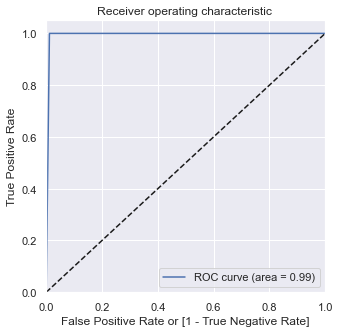

In [583]:
# Test set ROC Curve
draw_roc(y_train,y_train_pred )

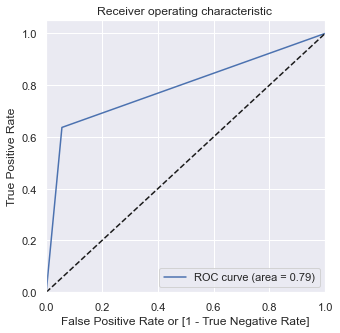

In [584]:
# Test set ROC Curve
draw_roc(y_test,y_test_pred )

### Observation 
- As we can see in both train and test set, the sensitivity score increased. but its still its less than logistic regression
- Also we can see that Precision and recall is more for predicting non churn customer when compared to churn customer
- Are under curve is 81% in test set which seems to be good

## XGboost

In [585]:
from xgboost import XGBClassifier

In [586]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [587]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [588]:
# Accuracy
confusion=confusion_matrix(y_train,y_train_pred)
print("Accuracy test set",accuracy_score(y_train,y_train_pred))
get_other_accuracy(confusion)

Accuracy test set 0.998411525674178
Sensitivity 1.0
specificity 0.9968230513483561
false postive rate -predicting churn when customer does not have churned  0.003176948651643886


In [589]:
# Accuracy
confusion=confusion_matrix(y_test,y_test_pred)
print("Accuracy test set",accuracy_score(y_test,y_test_pred))
get_other_accuracy(confusion)

Accuracy test set 0.916920121658396
Sensitivity 0.5739910313901345
specificity 0.9432856404068264
false postive rate -predicting churn when customer does not have churned  0.05671435959317359


In [590]:
# evaluate predictions
roc = roc_auc_score(y_test, y_test_pred)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 75.86%


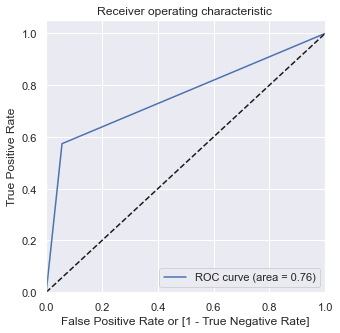

In [591]:
# Roc Curve
draw_roc(y_test,y_test_pred )

### Observation
- We can see that Area under curve is around 74 and also close to TPR. 
- Also the train and test accuracy is above 90 which seems to be good.
- on the other hand there is marginal difference between train and test score which suggests it has overfitted a little
- Also sensitivity score is less and specificity is more. 

# Conclusion  
- Using Logistic Regression we were able to find out the best predictors. Also the model yielded good accuracy on both train and test set. Since the accuracy were close together, we can also say that model did not overfit. 
- We also evaluated model on ROC, Sensitivity, Specificity and we found that it yielded good scores.
- We also evaluated Random forest model by passing default parameters. We saw that although model yielded good accuracy , but the sensitivity score was less. 
- After tuning hyperparameters in random forest, we found a slight increase in sensitivity score, but it was not good enough. Hence we can say that Random is not performing good on dataset.
- We evaluated XGboost as well, which yielded not good enough accuracy. Hence We can conclude that Tree Models are not performing well on the dataset.

# Recomendation to Business
- Maximum recharge amount has been decreased in 8th month.
- 2G and 3G usage for churned customers drops in 8th month compare to 6th and 7th
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.
- Average revenue per user has been decreased significantly for churn customers, while it remains uniform for Non churn customers.
- onnet and offnet usage has been significantly decreased for Churn customers.
- There are no customers who is using the service since more than 5 years are going to churn.
- Top Predictors
    1. Local incoming minutes(loc_ic_mou_8) of usage in 8th month is strong predictor of whether customer will churn or not along with special incoming minutes of usage . If these variables decreases customer more chance that he/she will likely to churn.
    2. last_day_rch_amt_8 : date when last recharge is done is also good predictor, as if the customer has not done any recharge since long time, then he is likely to churn.
    3. Also if Total outgoing minutes of usage has reduced in 8th month, customer is likely to churn.
    4. Also if 2g & 3g services like internet, volume based internet cost(vbc), services scheme with less than one month validity(sachet) are also strong predictors, lesser the value of them , more likely the customer will churn.